**Team**: **SheCodes**

**Team Members and Contribution**: 
1. Asha Aher : Misleading Intentions
2. Monica Dommaraju : Text and Body
3. Sri Sruthi Chilukuri : Content Statistics
4. Swati Narkhede : Writing Style




**Alternus Vera Part4**

 The sources for news have become so many from online news and social media to news articles and newspapers.In this work, we as a team would like to put forward a machine learning model to make a prediction on the fake news and differentiate it from the real news based on various aspects. The data has been collected from kaggle and other sources which contained texts along with the speakers and authors; giving us good scope to build a separate model that can classify the truthful news content from the fake news. 

Datasets used: 
1. Kaggle Fake News Dataset
2. Liar-Liar Dataset
3. politifact news Dataset


# Data Loading and Pre Processing

In [0]:
import pandas as pd
import numpy as np
import csv
import re
import seaborn as sns
from google.colab import drive
import gensim
from scipy.spatial.distance import cosine
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from nltk.stem.porter import PorterStemmer
from sklearn import metrics
from gensim.models.word2vec import Word2Vec
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.pipeline import Pipeline
from nltk.corpus import stopwords
from string import punctuation
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
import matplotlib.pyplot as plt
from scipy import sparse
from gensim.models.doc2vec import TaggedDocument




[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [0]:
drive.mount('/content/drive')
# Load Fake News dataset from Kaggle


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
fake_train = pd.read_csv("/content/drive/Shared drives/SheCodes/Datasets/fakenews/train_fakenews.csv",sep=',')
fake_test = pd.read_csv("/content/drive/Shared drives/SheCodes/Datasets/fakenews/test_fakenews.csv",sep=',')
fake_submit = pd.read_csv("/content/drive/Shared drives/SheCodes/Datasets/fakenews/submit_fakenews.csv",sep=',')
fake_test = pd.merge(fake_test, fake_submit, on="id", how='left')
fake_train.head()


,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [0]:
fake_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [0]:
fake_test.head()


,id,title,author,text,label
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning...",0
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...,1
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...,0
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different...",1
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...,1


In [0]:
fake_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5200 entries, 0 to 5199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      5200 non-null   int64 
 1   title   5078 non-null   object
 2   author  4697 non-null   object
 3   text    5193 non-null   object
 4   label   5200 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 243.8+ KB


In [0]:
df_kaggle = pd.concat([fake_train, fake_test])
df_kaggle.shape
# Pick only title and text columns from Kaggle dataset
df_final = df_kaggle[['title', 'text', 'label']]
df_final.shape

(26000, 3)

In [0]:
# Load Liar-Liar dataset
columns = [
  'jsonid', 
  'label', 
  'text', 
  'subject', 
  'speaker', 
  'speakerjobtitle', 
  'stateinfo',
  'partyaffiliation', 
  'barelytruecounts', 
  'falsecounts',
  'halftruecounts',
  'mostlytrueocunts',
  'pantsonfirecounts',
  'context'
  ]
liar_train = pd.read_csv("/content/drive/Shared drives/SheCodes/Datasets/liar_dataset/train.tsv",sep='\t', names=columns)
liar_test = pd.read_csv("/content/drive/Shared drives/SheCodes/Datasets/liar_dataset/test.tsv",sep='\t', names=columns)
liar_valid = pd.read_csv("/content/drive/Shared drives/SheCodes/Datasets/liar_dataset/valid.tsv",sep='\t', names=columns)

In [0]:
liar_train.head()

,jsonid,label,text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN


As we can see above, there is no body feature in the Liar-Liar dataset. So we are going to leave this dataset for title vs body factor analysis

In [0]:
liar_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10240 entries, 0 to 10239
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   jsonid             10240 non-null  object 
 1   label              10240 non-null  object 
 2   text               10240 non-null  object 
 3   subject            10238 non-null  object 
 4   speaker            10238 non-null  object 
 5   speakerjobtitle    7343 non-null   object 
 6   stateinfo          8032 non-null   object 
 7   partyaffiliation   10238 non-null  object 
 8   barelytruecounts   10238 non-null  float64
 9   falsecounts        10238 non-null  float64
 10  halftruecounts     10238 non-null  float64
 11  mostlytrueocunts   10238 non-null  float64
 12  pantsonfirecounts  10238 non-null  float64
 13  context            10138 non-null  object 
dtypes: float64(5), object(9)
memory usage: 1.1+ MB


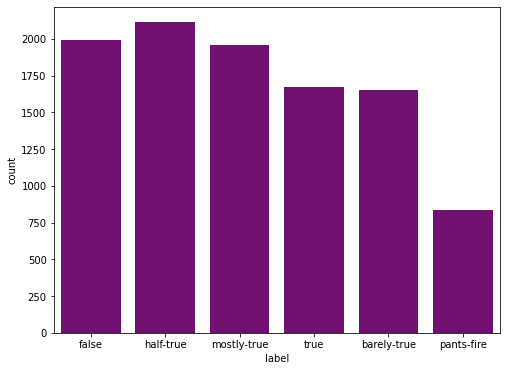

In [0]:
plt.figure(figsize=(8,6))
p=sns.countplot(liar_train["label"], color='purple')

We can see that in liar train dataset, half true news are more as compared to other category of news.

For a better classification; we combine the labels in the following way:

* "False", "half-true", "barely-true", "pants-fire" as lies i.e. class 0
* "True" & "mostly-true" as truth i.e. class 1

In [0]:
cat_to_nums = {"label":     {"true":1, "false":0, "barely-true": 0, "half-true": 0, "mostly-true": 1,"pants-fire": 0} }
liar_train.replace(cat_to_nums, inplace=True)
liar_train['label']


0        0
1        0
2        1
3        0
4        0
        ..
10235    1
10236    1
10237    0
10238    0
10239    0
Name: label, Length: 10240, dtype: int64

30

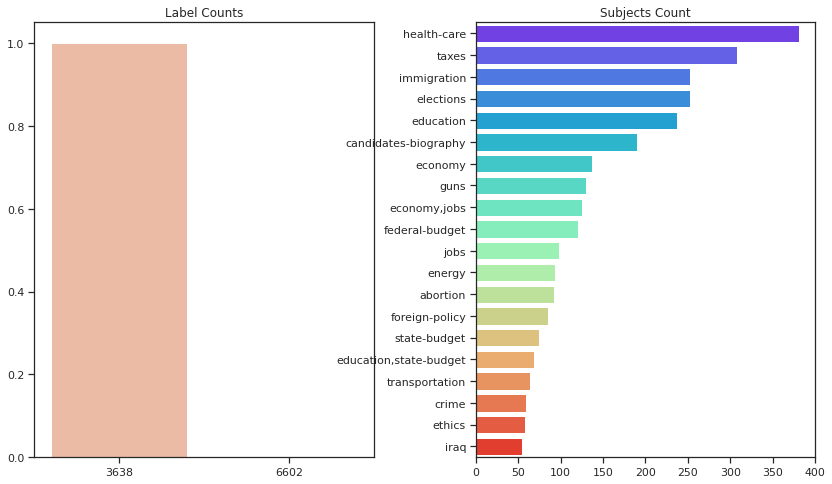

In [0]:
import gc
import matplotlib.pyplot as matplot_plt
import seaborn as seaborn_lib; seaborn_lib.set(style="ticks", color_codes=True)
f,ax = matplot_plt.subplots(1,2, figsize=(14,8))
ax1,ax2, = ax.flatten()
cnt = liar_train['label'].value_counts()[:20].to_frame()

seaborn_lib.barplot(cnt['label'], cnt.index, palette = 'RdBu', ax =ax1)
ax1.set_xlabel('')
ax1.set_title('Label Counts')

cnt = liar_train['subject'].value_counts()[:20].to_frame()

seaborn_lib.barplot(cnt['subject'], cnt.index, palette = 'rainbow', ax =ax2)
ax2.set_xlabel('')
ax2.set_title('Subjects Count')
matplot_plt.subplots_adjust(wspace=0.3)
gc.collect()

In [0]:
# Drop unwanted features from liar liar dataset
liar_train_new = liar_train.drop(['jsonid','subject','speaker', 'speakerjobtitle','stateinfo','partyaffiliation',
 'barelytruecounts', 'falsecounts', 'halftruecounts','mostlytrueocunts','pantsonfirecounts','context'], axis = 1)

In [0]:
liar_train_new.head()

,label,text
0,0,Says the Annies List political group supports ...
1,0,When did the decline of coal start? It started...
2,1,"Hillary Clinton agrees with John McCain ""by vo..."
3,0,Health care reform legislation is likely to ma...
4,0,The economic turnaround started at the end of ...


In [0]:
# Merging Kaggle Fake news dataset and Liar Liar dataset
merged_data = pd.concat([df_final, liar_train_new])

In [0]:
merged_data.shape

(36240, 3)

In [0]:
merged_data.head()

,title,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Ever get the feeling your life circles the rou...,0
2,Why the Truth Might Get You Fired,"Why the Truth Might Get You Fired October 29, ...",1
3,15 Civilians Killed In Single US Airstrike Hav...,Videos 15 Civilians Killed In Single US Airstr...,1
4,Iranian woman jailed for fictional unpublished...,Print \nAn Iranian woman has been sentenced to...,1


In [0]:
# Load Politifact news dataset
politifact_fake = pd.read_csv("/content/drive/Shared drives/SheCodes/Datasets/poitifact_dataset/Fake.csv",sep=',')
politifact_fake['label'] = 1
politifact_true = pd.read_csv("/content/drive/Shared drives/SheCodes/Datasets/poitifact_dataset/True.csv",sep=',')
politifact_true['label'] = 0
df_politifact = pd.concat([politifact_fake, politifact_true])
df_politifact.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [0]:
df_politifact.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


In [0]:
df_politifact_new = df_politifact[['title', 'text', 'label']]

In [0]:
df_final = pd.concat([merged_data, df_politifact_new])
df_final = df_final.sample(frac=1).reset_index(drop=True)
df_final.head()

,title,text,label
0,"Macri vows now, ""mature"" relationship with the...",BUENOS AIRES (Reuters) - Argentine leader Maur...,0
1,Chinese space official promoted as part of mil...,BEIJING (Reuters) - A senior Chinese space off...,0
2,Republican Senator Just Had A Priest Thrown I...,Protests against Trumpcare are ramping up now ...,1
3,Cuba could stop 'attacks' against Americans: W...,WASHINGTON (Reuters) - U.S. President Donald T...,0
4,N.J. Governor Chris Christie accosts heckler i...,NEW YORK (Reuters) - New Jersey Governor Chris...,0


In [0]:
df_final = df_final.fillna(0)

In [0]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81138 entries, 0 to 81137
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   81138 non-null  object
 1   text    81138 non-null  object
 2   label   81138 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.9+ MB


# Text Cleaning

In this section, we are going to clean the tile and text string by performing the following text cleaning operations
* Lower case text
* Remove special characters
* Tokenize text into words using nltk
* Remove stop Words
* Lemmatization and Stemming

In [0]:
import re
import time
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

# Remove this line when you want to run this for complete dataset
df_final = df_final.truncate(after=10000)

def text_cleaning(text):
  lemmatizer = WordNetLemmatizer()
  #clean_text = re.sub("[^a-zA-Z]", " ", text)
  clean_text = re.sub("[^a-zA-Z]", " ",str(text))
  lowered_text = clean_text.lower()
  words = nltk.word_tokenize(lowered_text)
  # All stop words
  stop_words = set(nltk.corpus.stopwords.words("english"))
  filtered_words = [word for word in  words  if not word in stop_words]
  lemm_words = [lemmatizer.lemmatize(word) for word in filtered_words]
  stems = [SnowballStemmer('english').stem(word) for word in lemm_words]
  return " ".join(stems)

t1 = time.time()
df_final["title"] = df_final["title"].apply(text_cleaning)
df_final["text"] = df_final["text"].apply(text_cleaning)
t2 = time.time()
print("Time take for text cleaning with length: {} is {} mins".format(len(df_final), (t2-t1)/60))
df_final.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Time take for text cleaning with length: 10001 is 1.3973040302594504 mins


,title,text,label
0,macri vow matur relationship u,bueno air reuter argentin leader mauricio macr...,0
1,chines space offici promot part militari reshuffl,beij reuter senior chines space offici militar...,0
2,republican senat priest thrown jail protest tr...,protest trumpcar ramp congression budget offic...,1
3,cuba could stop attack american white hous,washington reuter u presid donald trump chief ...,0
4,n j governor chris christi accost heckler milw...,new york reuter new jersey governor chris chri...,0


# Visualizations


**Word clouds**

In [0]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

def plot_wordcloud(data,backgroundcolor = 'white', width = 800, height = 600):
    wordcloud = WordCloud(stopwords = STOPWORDS, background_color = backgroundcolor,
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15, 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    

**plotting word cloud for titles**

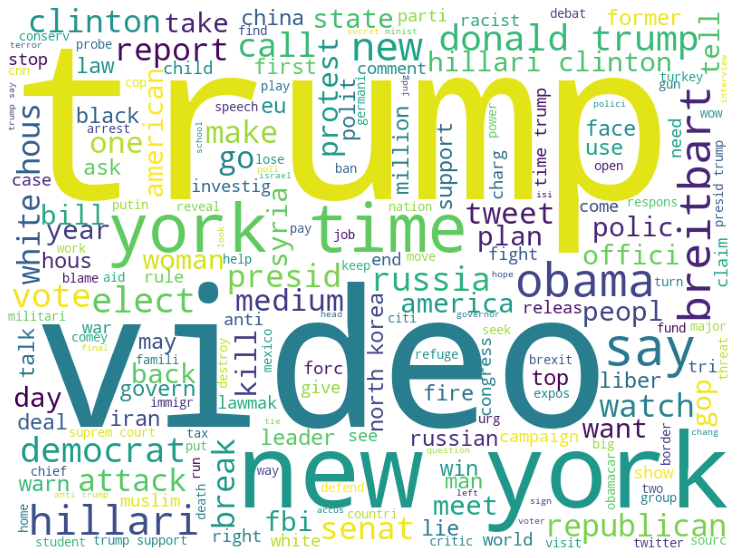

In [0]:
plot_wordcloud(' '.join(df_final['title']))

**plotting word cloud for text**

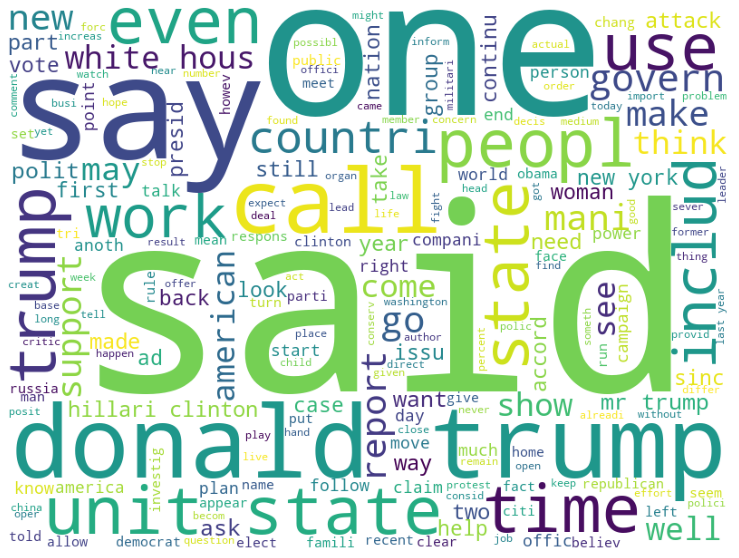

In [0]:
plot_wordcloud(' '.join(df_final['text']))

# Factor 1: Title Vs Body 
**Name: Monica Dommaraju**


The main idea of Title vs Body factor analysis is to pick Title and text features for each of these three datasets 
1. Kaggle Fake News Dataset
2. Liar-Liar Dataset
3. politifact news Dataset

and perform the following steps
* Amalgamate all three datasets
* cleaning the dataset 
* visualizing it using wordcloud
* Calculate cosine similarity between Tile and Body for each sample
* Calculate Number of matching strong words between these two columns
* Run multiple classification models

**LDA for Topic Modelling**

# TF_IDF and Cosine Similarities

Now lets calculate the cosine similarities between the Title and Text for each of the samples. This involves that we first find the strong words using TF-IDF and then perform the cosine similarity.

In [0]:
df_final_new = df_final.copy()

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfVec = TfidfVectorizer(max_features=600)

tfidf_title = tfidfVec.fit_transform(df_final_new['title'])
tfidf_title.toarray()
tfidf_title.shape
# tfidfVec.vocabulary_

(10001, 600)

In [0]:
tfidf_text = tfidfVec.fit_transform(df_final_new['text'])
tfidf_text.toarray()
tfidf_text.shape
# tfidfVec.vocabulary_

(10001, 600)

In [0]:
len(df_final_new)
tfidf_title[0].toarray()
tfidf_text[0].toarray()
len(tfidf_title.toarray())

10001

In [0]:
from scipy.spatial.distance import cosine
similarity_score = []
for i in range(len(df_final_new)):
    similarity_score.append(1 - cosine(tfidf_title[i].toarray(), tfidf_text[i].toarray()))
df_final_new['similarity_title_text'] = similarity_score
df_final_new.info()

/usr/local/lib/python3.6/dist-packages/scipy/spatial/distance.py:720: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  10001 non-null  object 
 1   text                   10001 non-null  object 
 2   label                  10001 non-null  int64  
 3   similarity_title_text  8422 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 312.7+ KB


Now lets calculate the number of common words between title and text

In [0]:
def count_common_words(title, text):
  title_words = title.split()
  text_words = text.split()
  return len(set(title_words).intersection(set(text_words)))

df_final_new['common_words_count'] = [count_common_words(title, text) for title, text in zip(df_final_new['title'], df_final_new['text'])]
df_final_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  10001 non-null  object 
 1   text                   10001 non-null  object 
 2   label                  10001 non-null  int64  
 3   similarity_title_text  8422 non-null   float64
 4   common_words_count     10001 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 390.8+ KB


# Model Training

In [0]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, roc_auc_score, f1_score, confusion_matrix, accuracy_score, \
    classification_report, precision_recall_curve, roc_curve, auc, average_precision_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score, train_test_split, cross_val_predict
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler

df_final_new = df_final_new.drop(['title', 'text'], axis=1)
df_final_new = df_final_new.fillna(0)

y = df_final_new['label']
X = df_final_new.drop(['label'], axis=1)

In [0]:
X.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)

X_final_train, X_final_test, y_final_train, y_final_test = train_test_split(X, y, test_size=0.20, random_state=100, stratify=y)
X_final_train.reset_index(drop=True, inplace=True)
X_final_test.reset_index(drop=True, inplace=True)
y_final_train.reset_index(drop=True, inplace=True)
y_final_test.reset_index(drop=True, inplace=True)

In [0]:
classifiers = {
    "LogisticRegression": (LogisticRegression()),
    "KNearest": (KNeighborsClassifier()),
    "Support Vector Classifier": (SVC()),
    "DecisionTreeClassifier": (DecisionTreeClassifier()),
    "Naive Bayes": (GaussianNB()),
    "Random forests": (RandomForestClassifier()),
    "XGBoost Classifier": (XGBClassifier()),
    "GradientBoostingClassifier": (GradientBoostingClassifier()),
    "MLP Classifier": (MLPClassifier())
}

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

def run_all_models(folds=5):
    for classifier_name, classifier in classifiers.items():
        k_fold = StratifiedKFold(n_splits=folds, random_state=100, shuffle=True)
        cross_val_scores = []
        precision_scores = []
        recall_scores = []
        roc_auc_scores = []
        f1_scores = []
        for train_index, test_index in k_fold.split(X_final_train, y_final_train):
            X_train, X_test = pd.DataFrame(data=X_final_train, index=train_index), pd.DataFrame(data=X_final_train, index=test_index)
            y_train, y_test = pd.DataFrame(data=y_final_train, index=train_index), pd.DataFrame(data=y_final_train, index=test_index)
            model = classifier

            model.fit(X_train, y_train)
            scores = cross_val_score(model, X_train, y_train.values.ravel(), cv=5)
            cross_val_scores.append(scores)
            y_pred = model.predict(X_test)
            precision_scores.append(precision_score(y_test, y_pred))
            recall_scores.append(recall_score(y_test, y_pred))
            roc_auc_scores.append(roc_auc_score(y_test, y_pred))
            f1_scores.append(f1_score(y_test, y_pred))

        print('============================= {} ============================='.format(classifier_name))
        print('Mean cross validation score: {}'.format(np.array([cross_val_scores]).mean()))
        print('Mean precision score: {}'.format(np.array([precision_scores]).mean()))
        print('Mean Recall score: {}'.format(np.array([recall_scores]).mean()))
        print('Mean ROC-AUC score: {}'.format(np.array([roc_auc_scores]).mean()))
        print('Mean F1 score: {}'.format(np.array([f1_scores]).mean()))
        print('******* Real test dataset metrics *******')
        y_final_pred = model.predict((X_final_test))
        print('Accuracy score for the real test set:\n', accuracy_score(y_final_test, y_final_pred))
        print('confusion matrix for the real test set:\n', confusion_matrix(y_final_test, y_final_pred))
        print('Classification report for the real test set:\n', classification_report(y_final_test, y_final_pred))
        if classifier_name != 'Support Vector Classifier':
            y_final_pred_prob = model.predict_proba(X_test)
            plot_auc_roc_curve(y_test, y_final_pred_prob[:, 1], classifier_name)
            plot_precision_recall_curve(y_test, y_final_pred_prob[:, 1], classifier_name)



In [0]:
def plot_auc_roc_curve(y_test, y_pred, name):
    fpr, tpr, thresholds = roc_curve(y_test.to_numpy(), y_pred)
    roc_auc = auc(fpr, tpr)

    # Plot ROC
    plt.title('ROC for {}'.format(name))
    plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([-0.1, 1.0])
    plt.ylim([-0.1, 1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [0]:
def plot_precision_recall_curve(y_test, y_pred_prob, name):
    # Generate precision recall curve values: precision, recall, thresholds
    precision, recall, thresholds = precision_recall_curve(y_test.to_numpy(), y_pred_prob)

    # Plot Precision Recall curve
    plt.plot(recall, precision)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    avg_precision_score = average_precision_score(y_test, y_pred_prob)
    plt.title('PRC for {} - avg precision score: {}'.format(name, str(avg_precision_score)))
    plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

============================= LogisticRegression =============================
Mean cross validation score: 0.52953125
Mean precision score: 0.5235443146075357
Mean Recall score: 0.6362617739586277
Mean ROC-AUC score: 0.526353765379832
Mean F1 score: 0.5732497236035777
******* Real test dataset metrics *******
Accuracy score for the real test set:
 0.526736631684158
confusion matrix for the real test set:
 [[445 552]
 [395 609]]
Classification report for the real test set:
               precision    recall  f1-score   support

           0       0.53      0.45      0.48       997
           1       0.52      0.61      0.56      1004

    accuracy                           0.53      2001
   macro avg       0.53      0.53      0.52      2001
weighted avg       0.53      0.53      0.52      2001



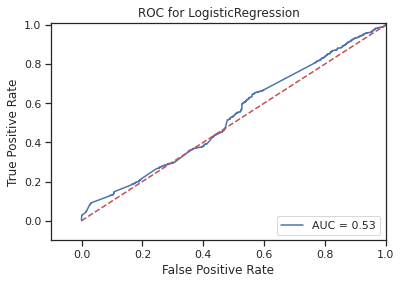

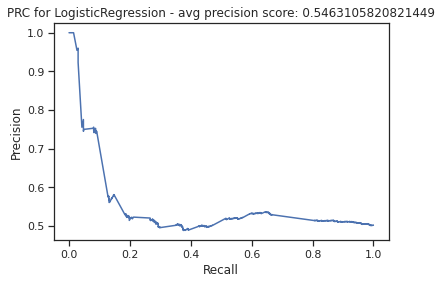

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed

============================= KNearest =============================
Mean cross validation score: 0.55478125
Mean precision score: 0.5779539054896577
Mean Recall score: 0.488785197653438
Mean ROC-AUC score: 0.5627597211494644
Mean F1 score: 0.5242290385208839
******* Real test dataset metrics *******
Accuracy score for the real test set:
 0.545727136431784
confusion matrix for the real test set:
 [[436 561]
 [348 656]]
Classification report for the real test set:
               precision    recall  f1-score   support

           0       0.56      0.44      0.49       997
           1       0.54      0.65      0.59      1004

    accuracy                           0.55      2001
   macro avg       0.55      0.55      0.54      2001
weighted avg       0.55      0.55      0.54      2001



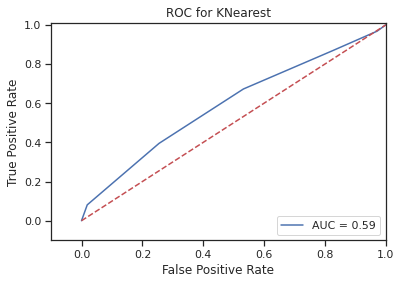

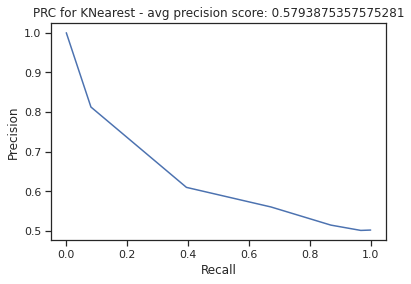

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

============================= Support Vector Classifier =============================
Mean cross validation score: 0.5938125
Mean precision score: 0.651815747456722
Mean Recall score: 0.412052061626755
Mean ROC-AUC score: 0.5952638681922701
Mean F1 score: 0.5048682897992791
******* Real test dataset metrics *******
Accuracy score for the real test set:
 0.5732133933033483
confusion matrix for the real test set:
 [[752 245]
 [609 395]]
Classification report for the real test set:
               precision    recall  f1-score   support

           0       0.55      0.75      0.64       997
           1       0.62      0.39      0.48      1004

    accuracy                           0.57      2001
   macro avg       0.58      0.57      0.56      2001
weighted avg       0.58      0.57      0.56      2001

============================= DecisionTreeClassifier =============================
Mean cross validation score: 0.5664375
Mean precision score: 0.5783254133787122
Mean Recall score: 0.4773

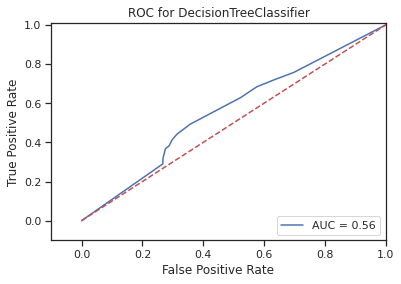

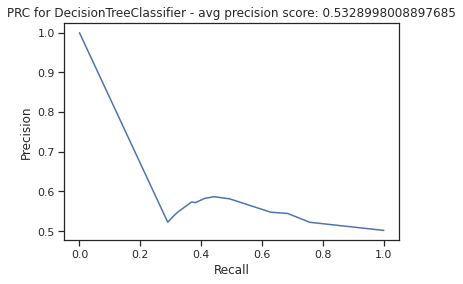

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = col

============================= Naive Bayes =============================
Mean cross validation score: 0.53959375
Mean precision score: 0.5253041023227285
Mean Recall score: 0.7523718723117486
Mean ROC-AUC score: 0.5337363366237945
Mean F1 score: 0.6165489016468191
******* Real test dataset metrics *******
Accuracy score for the real test set:
 0.5372313843078461
confusion matrix for the real test set:
 [[286 711]
 [215 789]]
Classification report for the real test set:
               precision    recall  f1-score   support

           0       0.57      0.29      0.38       997
           1       0.53      0.79      0.63      1004

    accuracy                           0.54      2001
   macro avg       0.55      0.54      0.51      2001
weighted avg       0.55      0.54      0.51      2001



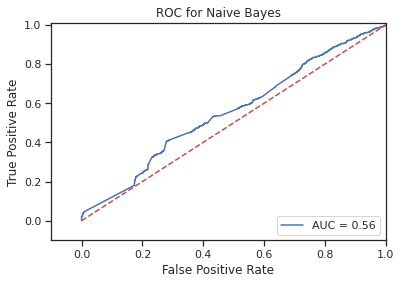

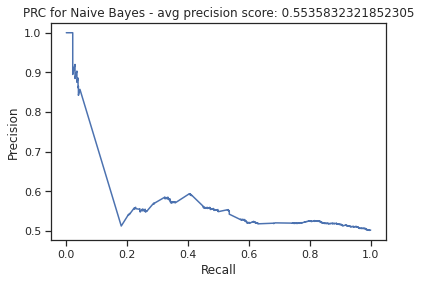

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed whe

============================= Random forests =============================
Mean cross validation score: 0.56684375
Mean precision score: 0.5755161033464826
Mean Recall score: 0.47632879196777667
Mean ROC-AUC score: 0.5612960959992971
Mean F1 score: 0.5212108316066131
******* Real test dataset metrics *******
Accuracy score for the real test set:
 0.545727136431784
confusion matrix for the real test set:
 [[631 366]
 [543 461]]
Classification report for the real test set:
               precision    recall  f1-score   support

           0       0.54      0.63      0.58       997
           1       0.56      0.46      0.50      1004

    accuracy                           0.55      2001
   macro avg       0.55      0.55      0.54      2001
weighted avg       0.55      0.55      0.54      2001



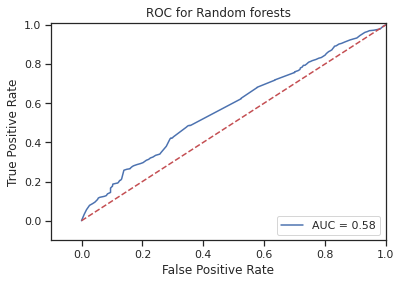

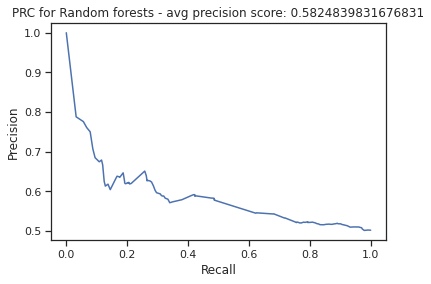

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

============================= XGBoost Classifier =============================
Mean cross validation score: 0.5930624999999999
Mean precision score: 0.6480557722235626
Mean Recall score: 0.42401002475132216
Mean ROC-AUC score: 0.5961017032873821
Mean F1 score: 0.5126073693096317
******* Real test dataset metrics *******
Accuracy score for the real test set:
 0.5747126436781609
confusion matrix for the real test set:
 [[744 253]
 [598 406]]
Classification report for the real test set:
               precision    recall  f1-score   support

           0       0.55      0.75      0.64       997
           1       0.62      0.40      0.49      1004

    accuracy                           0.57      2001
   macro avg       0.59      0.58      0.56      2001
weighted avg       0.59      0.57      0.56      2001



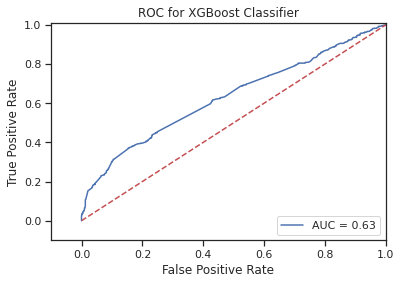

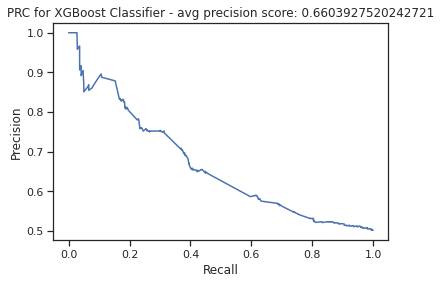

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

============================= GradientBoostingClassifier =============================
Mean cross validation score: 0.59284375
Mean precision score: 0.647951006019329
Mean Recall score: 0.4347217261950975
Mean ROC-AUC score: 0.5984459472005289
Mean F1 score: 0.5202618275112847
******* Real test dataset metrics *******
Accuracy score for the real test set:
 0.5727136431784108
confusion matrix for the real test set:
 [[742 255]
 [600 404]]
Classification report for the real test set:
               precision    recall  f1-score   support

           0       0.55      0.74      0.63       997
           1       0.61      0.40      0.49      1004

    accuracy                           0.57      2001
   macro avg       0.58      0.57      0.56      2001
weighted avg       0.58      0.57      0.56      2001



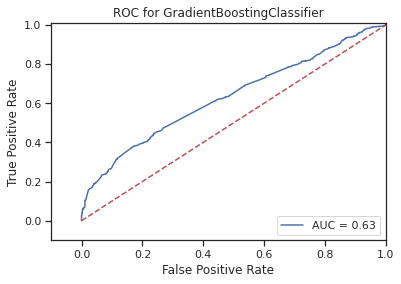

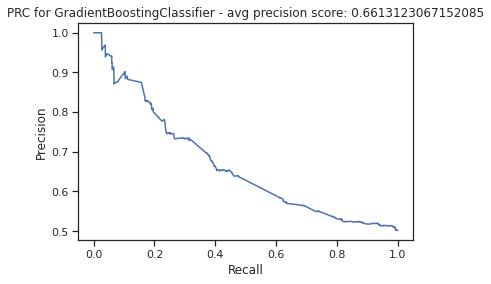

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d

============================= MLP Classifier =============================
Mean cross validation score: 0.59740625
Mean precision score: 0.6389106193036369
Mean Recall score: 0.46113328136694376
Mean ROC-AUC score: 0.5991090758177317
Mean F1 score: 0.5353443589774587
******* Real test dataset metrics *******
Accuracy score for the real test set:
 0.5787106446776612
confusion matrix for the real test set:
 [[708 289]
 [554 450]]
Classification report for the real test set:
               precision    recall  f1-score   support

           0       0.56      0.71      0.63       997
           1       0.61      0.45      0.52      1004

    accuracy                           0.58      2001
   macro avg       0.58      0.58      0.57      2001
weighted avg       0.59      0.58      0.57      2001



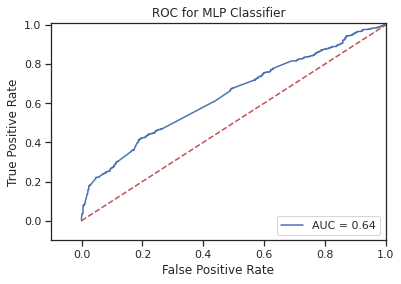

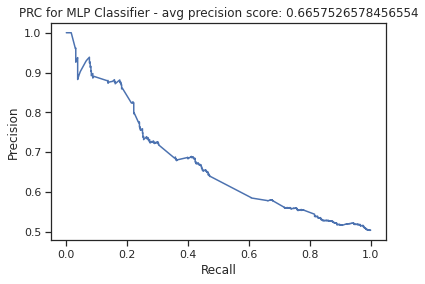

In [0]:
run_all_models()

# Accuracies

#Factor 2 : Writting Style #
Team Member: Swati Narkhede

Writing style of any article can tell us alot about the authors and their motives. We can determine whether the content is True or False. 
We can identify fakeness of any article by examining the Sentiments generated by the sentence. Usually, a fake content contains strong sentiments. True article has neutral tone. 
To identify the fakeness of any article we can examine the gramatical mistakes, Writing quality and professionalism of the article.

1. Checking Writing quality by identifying the unprofessional words used in content. In informal conversation, we usually contract the words in content. Hence, here we will take count of contracted words.

In [0]:
# To check if the writing style is professional or not we will use word contraction list and count the unprofessional words used in text

word_contractions_list = ['tis', 'aint', 'amnt', 'arent', 'cant', 'couldve', 'couldnt', 'couldntve',
                    'didnt', 'doesnt', 'dont', 'gonna', 'gotta', 'hadnt', 'hadntve', 'hasnt',
                    'havent', 'hed', 'hednt', 'hedve', 'hell', 'hes', 'hesnt', 'howd', 'howll',
                    'hows', 'id', 'idnt', 'idntve', 'idve', 'ill', 'im', 'ive', 'ivent', 'isnt',
                    'itd', 'itdnt', 'itdntve', 'itdve', 'itll', 'its', 'itsnt', 'mightnt',
                    'mightve', 'mustnt', 'mustntve', 'mustve', 'neednt', 'oclock', 'ol', 'oughtnt',
                    'shant', 'shed', 'shednt', 'shedntve', 'shedve', 'shell', 'shes', 'shouldve',
                    'shouldnt', 'shouldntve', 'somebodydve', 'somebodydntve', 'somebodys',
                    'someoned', 'someonednt', 'someonedntve', 'someonedve', 'someonell', 'someones',
                    'somethingd', 'somethingdnt', 'somethingdntve', 'somethingdve', 'somethingll',
                    'somethings', 'thatll', 'thats', 'thatd', 'thered', 'therednt', 'theredntve',
                    'theredve', 'therere', 'theres', 'theyd', 'theydnt', 'theydntve', 'theydve',
                    'theydvent', 'theyll', 'theyontve', 'theyre', 'theyve', 'theyvent', 'wasnt',
                    'wed', 'wedve', 'wednt', 'wedntve', 'well', 'wontve', 'were', 'weve', 'werent',
                    'whatd', 'whatll', 'whatre', 'whats', 'whatve', 'whens', 'whered', 'wheres',
                    'whereve', 'whod', 'whodve', 'wholl', 'whore', 'whos', 'whove', 'whyd', 'whyre',
                    'whys', 'wont', 'wontve', 'wouldve', 'wouldnt', 'wouldntve', 'yall', 'yalldve',
                    'yalldntve', 'yallll', 'yallont', 'yallllve', 'yallre', 'yallllvent', 'yaint',
                    'youd', 'youdve', 'youll', 'youre', 'yourent', 'youve', 'youvent','whose', 'whats', 'whatre', 'whenre', 'whens', 'couldnt', 'wheres', 'whered', 'whys', 'cant',
            'isnt','shouldnt','youre', 'youll', 'youd','heres','hows', 'howd', 'arent', 'doesnt']

In [0]:
# Function to check the total number of unprofessional words used in text

def num_contraction(text):
    spl = text.split()
    num = len([word for word in spl if word in word_contractions_list])
    return num

The sentiments of a Fake news content are highly polarized. Either they are highly positive or highly negative. True news contents generate neutral sentiments. Hence, we will check Sentiment Polarity analysis and generate Compound Sentiment score in dataset.

In [0]:
# Sentiment polarity Analysis

sia = SentimentIntensityAnalyzer()
def sentiment(text):
    score = sia.polarity_scores(text)
    return score['compound']


In [0]:
my_data = df_final.copy()

In [0]:
my_data.head()

,title,text,label
0,easi understand reason ancestor illeg come ame...,mani time liber use argument everyon relat cam...,1
1,fed warn spring break travel mexico,mani high school colleg student around countri...,0
2,china say make unremit effort north korea nucl...,beij reuter china said wednesday make unremit ...,0
3,donald trump face obstacl resum waterboard new...,washington first month donald j trump presid r...,0
4,make special counsel lead trump russia collus ...,serious make stuff great real honest medium to...,1


In [0]:
my_data['num_contraction'] = my_data['text'].apply(num_contraction)
my_data['senti'] = my_data['text'].apply(sentiment)

In [0]:
# Creating processed doc and dictionary
processed_docs = my_data['text'].map(lambda doc: doc.split(" "))

In [0]:
#Function to get tokens of document
def get_tokens(text):
    token = []
    for tk in gensim.utils.simple_preprocess(text):
        if len(tk) > 3:
            token.append(tk)
    return token


In [0]:
tokenized_docs = my_data['text'].map(get_tokens)

In [0]:
# Function to get dictionary
def get_dictionary(processed_docs):
    dict_gensim = gensim.corpora.Dictionary(processed_docs)
    dict_gensim.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)
    return dict_gensim

# Function to get Bag of Words
def get_bow_corpus(processed_docs, tokenized_docs):
    dict_gensim = get_dictionary(processed_docs)

    bow_corpus = [dict_gensim.doc2bow(doc) for doc in tokenized_docs]
    return bow_corpus


In [0]:
dictionary = get_dictionary(processed_docs)
bow_corpus = get_bow_corpus(processed_docs, tokenized_docs)

In [0]:
# Running LDA using Bag of Words on train dataset
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)

In [0]:
# Checking the topics and words
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.025*"trump" + 0.010*"clinton" + 0.007*"presid" + 0.007*"state" + 0.006*"hillari" + 0.005*"time" + 0.005*"democrat" + 0.005*"republican" + 0.005*"would" + 0.005*"elect"
Topic: 1 
Words: 0.014*"trump" + 0.008*"presid" + 0.007*"obama" + 0.005*"peopl" + 0.005*"like" + 0.005*"would" + 0.005*"make" + 0.004*"state" + 0.004*"also" + 0.004*"year"
Topic: 2 
Words: 0.008*"state" + 0.008*"trump" + 0.008*"presid" + 0.006*"would" + 0.006*"hous" + 0.006*"republican" + 0.006*"senat" + 0.005*"time" + 0.005*"clinton" + 0.005*"obama"
Topic: 3 
Words: 0.008*"state" + 0.006*"year" + 0.005*"would" + 0.005*"like" + 0.005*"peopl" + 0.004*"time" + 0.004*"world" + 0.004*"unit" + 0.004*"countri" + 0.003*"also"
Topic: 4 
Words: 0.007*"peopl" + 0.006*"govern" + 0.005*"would" + 0.004*"trump" + 0.004*"attack" + 0.004*"like" + 0.004*"make" + 0.004*"time" + 0.004*"year" + 0.004*"also"
Topic: 5 
Words: 0.011*"clinton" + 0.009*"trump" + 0.009*"peopl" + 0.008*"would" + 0.006*"presid" + 0.005*"time" + 0

In [0]:
# Getting score
for index, score in sorted(lda_model[bow_corpus[4310]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))


Score: 0.5499318838119507	 
Topic: 0.008*"state" + 0.006*"year" + 0.005*"would" + 0.005*"like" + 0.005*"peopl" + 0.004*"time" + 0.004*"world" + 0.004*"unit" + 0.004*"countri" + 0.003*"also"

Score: 0.05002133920788765	 
Topic: 0.009*"trump" + 0.008*"state" + 0.006*"nation" + 0.005*"would" + 0.005*"year" + 0.005*"like" + 0.005*"peopl" + 0.004*"countri" + 0.004*"clinton" + 0.004*"time"

Score: 0.050010573118925095	 
Topic: 0.014*"trump" + 0.008*"presid" + 0.007*"obama" + 0.005*"peopl" + 0.005*"like" + 0.005*"would" + 0.005*"make" + 0.004*"state" + 0.004*"also" + 0.004*"year"

Score: 0.050009310245513916	 
Topic: 0.008*"state" + 0.008*"trump" + 0.008*"presid" + 0.006*"would" + 0.006*"hous" + 0.006*"republican" + 0.006*"senat" + 0.005*"time" + 0.005*"clinton" + 0.005*"obama"

Score: 0.05000720173120499	 
Topic: 0.007*"year" + 0.006*"report" + 0.006*"state" + 0.006*"govern" + 0.006*"peopl" + 0.005*"polic" + 0.004*"also" + 0.004*"time" + 0.004*"group" + 0.003*"countri"

Score: 0.05000631883

In [0]:
my_data['LDA_Score'] = score

In [0]:
my_data.head()

,title,text,label,num_contraction,senti,LDA_Score
0,easi understand reason ancestor illeg come ame...,mani time liber use argument everyon relat cam...,1,1,0.9062,0.050002
1,fed warn spring break travel mexico,mani high school colleg student around countri...,0,0,-0.9898,0.050002
2,china say make unremit effort north korea nucl...,beij reuter china said wednesday make unremit ...,0,0,-0.6908,0.050002
3,donald trump face obstacl resum waterboard new...,washington first month donald j trump presid r...,0,2,-0.9987,0.050002
4,make special counsel lead trump russia collus ...,serious make stuff great real honest medium to...,1,0,0.9761,0.050002


*Training Model and Evaluation*

In [0]:

my_data = my_data.drop(['title', 'text'], axis=1)
y = my_data['label']  
X = my_data.drop(['label'], axis=1)
X = X.fillna(0)
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Implementing Support Vector Machine Classifier

In [0]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
y_pred = svclassifier.predict(X_test)

In [0]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("Confusion Matrix: \n")
print(confusion_matrix(y_test,y_pred))
print("Classification Report:\n")
print(classification_report(y_test,y_pred))
print('Accuracy score for SVM is :\n', accuracy_score(y_test, y_pred))


Confusion Matrix: 

[[1072  447]
 [1034  448]]
Classification Report:

              precision    recall  f1-score   support

           0       0.51      0.71      0.59      1519
           1       0.50      0.30      0.38      1482

    accuracy                           0.51      3001
   macro avg       0.50      0.50      0.48      3001
weighted avg       0.50      0.51      0.49      3001

Accuracy score for SVM is :
 0.5064978340553149


Using Naive Bayes Classifier

In [0]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train,y_train)

pred = model.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("Confusion Matrix: \n")
print(confusion_matrix(y_test,pred))
print("Classification Report:\n")
print(classification_report(y_test,pred))
print('Accuracy score for Naive Bayes:\n', accuracy_score(y_test, pred))

Confusion Matrix: 

[[1321  198]
 [1279  203]]
Classification Report:

              precision    recall  f1-score   support

           0       0.51      0.87      0.64      1519
           1       0.51      0.14      0.22      1482

    accuracy                           0.51      3001
   macro avg       0.51      0.50      0.43      3001
weighted avg       0.51      0.51      0.43      3001

Accuracy score for Naive Bayes:
 0.5078307230923026


Using KNearest Neighbors Classifier

In [0]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets
model.fit(X_train,y_train)

#Predict Output
predicted= model.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("Confusion Matrix: \n")
print(confusion_matrix(y_test,predicted))
print("Classification Report:\n")
print(classification_report(y_test,predicted))
print('Accuracy score for KNN Classifier:\n', accuracy_score(y_test, predicted))

Confusion Matrix: 

[[836 683]
 [764 718]]
Classification Report:

              precision    recall  f1-score   support

           0       0.52      0.55      0.54      1519
           1       0.51      0.48      0.50      1482

    accuracy                           0.52      3001
   macro avg       0.52      0.52      0.52      3001
weighted avg       0.52      0.52      0.52      3001

Accuracy score for KNN Classifier:
 0.5178273908697101


From above results, we can see for Writing Style Factor, we are getting accuracy ranging from 51% to 60%.

# Factor 3: Misleading Intents#
Team member: Asha Aher

##3 Data Narative

**Mis-leading Intentions** – Mis-leading intension is described as the diverted or false sentence/text i.e. misleading someone when you point them in the wrong direction, metaphorically or literally.

Below are some examples:

Example 1– 

Example 2- If you give a stranger/passenger direction away from the place he's looking for, then you are misleading him.

**Data Narrative:**

Predicting whether the sentence/text is misleading or not. This could help to save from the false intentions.
Using this model, we can predict if the given content is honest or dishonest.

Approach Used –
Pre-processing steps required for the feature -"Misleading Intentions":

Adding labels to the dataset.

Removing Special Characters and Punctuations

Converting characters to Lower case

Removing Stop Words

Checking for null values and dropping the non-required columns.

One hot encoding for converting categorical values to numeric values.

Checking for null values and dropping the non-required columns.

Lemmatization for grouping together the different inflected forms of a word so they can be analyzed as a single item.

Stemming for producing morphological variants of a root/base word.



**Classification using three different algorithms:**


Naive Bayes
Decision Tree
Random Forest

**Classification with TF-IDF:**

Random Forest
Naive Bayes

Prediction Function using Pipeline and Calculating MI Score.


**Performance Evaluation:**

Performance of the classification algorithms are measured using –

Accuracy Score
Confusion Matrix
Precision
Recall
F1 Score



In [0]:
df_final.to_csv('/content/drive/Shared drives/SheCodes/Datasets/liar_fakenews_amalgmated.csv')
df_new = df_final.copy()
df_new.shape


(10001, 3)

In [0]:
#df_final.to_csv(index=False)

In [0]:
X_train = df_new["text"]
Y_train = df_new["label"]

In [0]:
label_count = pd.crosstab(X_train,Y_train,margins=True)


In [0]:
label_count.head()

label                                               0    1  All
text                                                           
                                                    0  105  105
aarp largest resel insur countri vest interest ...  1    0    1
ab ili kilerind abd nato nun etkisi yazan manli...  0    1    1
abbi martin expos hillari clinton realli repres...  0    1    1
abbi martin expos hillari clinton realli repres...  0    1    1

Using Word2Vec

In [0]:
LabeledSentence = gensim.models.doc2vec.LabeledSentence

def labelled_sentences(articles, label_type):
    labelledSentences = []
    for i,_d in enumerate(articles):
        labelledSentences.append(LabeledSentence(_d, label_type[i]))
    return labelledSentences

In [0]:
df_train_labelled = labelled_sentences(X_train,Y_train)
df_train_labelled[:10]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `LabeledSentence` (Class will be removed in 4.0.0, use TaggedDocument instead).
  


[LabeledSentence(words='washington reuter super pac back republican donald trump buy tv airtim part florida begin week commerci aim use first ladi michell obama word hillari clinton erod democrat presidenti candid support woman voter battleground state ad super pac alreadi run onlin show michell obama say run hous run white hous could taken refer infidel clinton husband bill clinton ad say michell obama talk hillari clinton howev time candid barack obama deni wife word refer oppon democrat presidenti nomin repres clinton michell obama declin comment commerci super pac make america number hope ad air orlando tampa area reson woman spokesman hogan gidley told reuter tuesday trump struggl support woman voter mani cite tempera past negat comment woman includ comedian rosi donnel fox news host megyn kelli eleven day ago new york businessman campaign shaken releas tape show trump lewd brag kiss touch woman without permiss seri woman sinc come forward alleg behavior part deni accus florida qu

In [0]:
tagged_data = [TaggedDocument(words=_d, tags=[str(i)]) for i, _d in enumerate(X_train)]

In [0]:
tagged_data_words=[x.words for x in tagged_data]
tagged_data_words_1D=[]
for row in range(len(tagged_data_words)):
    for col in range(len(tagged_data_words[row])):
        tagged_data_words_1D.append(tagged_data_words[row][col])


In [0]:
n_dim=300
w2v = Word2Vec(size=n_dim, min_count=0)
w2v.build_vocab(tagged_data_words)
w2v.train(tagged_data_words,total_examples=w2v.corpus_count,epochs=w2v.epochs)

(14651817, 85652085)

In [0]:

df_train_statements=df_new[['text','label']]
df_train_statements_vectorized=df_train_statements['text'].map(lambda x: [w2v[w] for w in x])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
df_train_statements['text']=df_train_statements_vectorized

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_train_statements['label']=le.fit_transform(df_train_statements['label'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
df_train_statements.head()

,text,label
0,"[[0.014016117, -0.24724191, 0.17677905, -0.265...",0
1,"[[-0.07290875, -0.14195079, 0.08655751, -0.110...",1
2,"[[-0.059299085, -0.05266808, -0.124772325, 0.2...",1
3,"[[0.017319003, -0.0042957203, 0.00897491, 0.08...",1
4,"[[0.044539575, 0.0014530402, -0.16342664, 0.10...",0


In [0]:
def document_vector(doc):
    return np.mean(doc, axis=0)

In [0]:
for row_idx in range(len(df_train_statements['text'])):
    for col_idx in range(len(df_train_statements['text'][row_idx])):
        df_train_statements['text'][row_idx][col_idx]=document_vector(df_train_statements['text'][row_idx][col_idx])



In [0]:
df_train_statements.drop(index=4497,inplace=True)
df_train_statements.reset_index(drop=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,text,label
0,"[-0.0022015262, 0.005063507, -0.0030745526, -0...",0
1,"[-0.0028355746, 0.010325139, -0.0019631272, -0...",1
2,"[-0.011925758, -0.0020521276, -0.0020521276, -...",1
3,"[0.00020315369, 0.010325139, -0.0020521276, -0...",1
4,"[-0.0019631272, 0.010325139, -0.005350491, 0.0...",0
...,...,...
9995,"[-0.0049370276, 0.010325139, -0.005350491, -0....",1
9996,"[-0.005350491, 0.011157949, -0.00938565, -0.01...",1
9997,"[-0.0028355746, -0.011925758, -0.00013906996, ...",1
9998,"[0.0006614309, -0.005350491, 0.010325139, 0.00...",0


Converting Word Vec to Features:

In [0]:

texts=[]
for x in df_train_statements['text'].values:
    texts.append(x)   
X=pd.DataFrame(texts)
X=X.fillna(0)
y=df_train_statements[['label']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Using Doc2Vec

In [0]:
df_doc2vec = df_new
df_doc2vec = df_doc2vec[['text','label']]
df_doc2vec = df_doc2vec[pd.notnull(df_doc2vec['text'])]
df_doc2vec.head(10)

,text,label
0,washington reuter super pac back republican do...,0
1,comment promin democrat figur jame carvill let...,1
2,http www youtub com watch v rur pyr ax,1
3,noth sadder person us rubber glue defens excep...,1
4,morn woke learn peopl kill upward injur muslim...,0
5,marci kaptur fought democrat prescript drug be...,0
6,novemb day away tradit busiest day year guy fa...,1
7,washington reuter u justic depart given immun ...,0
8,donald trump continu travel mar lago florida c...,1
9,secret russia pro donald trump donald trump ex...,1


In [0]:
df_doc2vec['text'].apply(lambda x: len(x.split(' '))).sum()

2681081

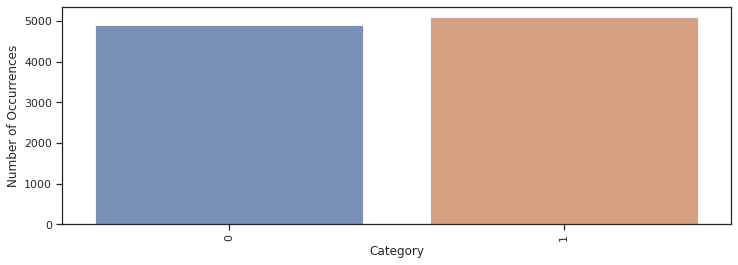

In [0]:
cnt_pro = df_doc2vec['label'].value_counts()

plt.figure(figsize=(12,4))
sns.barplot(cnt_pro.index, cnt_pro.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Category', fontsize=12)
plt.xticks(rotation=90)
plt.show();

Using TF-IDF

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
countV = CountVectorizer(stop_words='english', min_df=2, max_df=20, token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b')
 
train_count = countV.fit_transform(df_new['text'].values)
#test_count = countV.fit_transform(df_test['statement'].values)
print('COUNT VECTORIZER')


countVPlurals= countV.get_feature_names()
stemmer = PorterStemmer()
countVSingles= [stemmer.stem(plural) for plural in countVPlurals]


countVTokens = list(set(countVSingles))
print('countVTokens')
print(countVTokens)
print('------------------------------------------')
                         

tfidfV = TfidfVectorizer(stop_words='english', min_df=5, max_df=30, use_idf=True, smooth_idf=True, token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b')
train_tfidf = tfidfV.fit_transform(df_new['text'].values)
#test_tfidf = tfidfV.fit_transform(df_test['statement'].values)

print('TF-IDF VECTORIZER')


tfidfVPlurals= tfidfV.get_feature_names()
tfidfVSingles= [stemmer.stem(plural) for plural in tfidfVPlurals]

tfidfVTokens = list(set(tfidfVSingles))
print('TFIDFV Tokens')
print(tfidfVTokens)

COUNT VECTORIZER
countVTokens
['tentacl', 'toil', 'ponytail', 'brinkley', 'leninist', 'nrw', 'partier', 'zagreb', 'outmaneuv', 'mcgowin', 'tantamount', 'cometido', 'majesti', 'thou', 'velayati', 'warzon', 'lent', 'prudenc', 'gadi', 'hidey', 'mdma', 'namgyel', 'hobson', 'prepar', 'augustin', 'webster', 'flybi', 'rankl', 'addi', 'electro', 'vue', 'exxonmobil', 'wimpi', 'jacobi', 'tulsi', 'riotou', 'hud', 'utilizar', 'mando', 'dentro', 'mispercept', 'chirp', 'saffir', 'poignanc', 'rudimentari', 'semitrail', 'sizabl', 'butcher', 'lovemor', 'nakashima', 'threefold', 'nde', 'farmington', 'teak', 'datafolha', 'morgu', 'usci', 'stanch', 'magenta', 'bertram', 'coinag', 'azerbaijani', 'govabbott', 'thekevind', 'freemasonri', 'planificaci', 'moonlit', 'hof', 'nay', 'roulett', 'trekk', 'youngstown', 'pageview', 'bensonhurst', 'herr', 'keyword', 'aptitud', 'livabl', 'blake', 'jahren', 'chinchilla', 'dolbi', 'outsidetherealitymachin', 'aristocraci', 'petro', 'freder', 'exemplari', 'falta', 'hillyard

In [0]:
count_df = pd.DataFrame(df_new['text'], columns=countV.get_feature_names())

#count_df.tail()


#Classification Algorithms#

Applying Desicion Tree Classification:

In [0]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import  LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB


In [0]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_gini.fit(X_train, y_train)
dec_pred = clf_gini.predict(X_test)
accuracy_score =  clf_gini.score(X_test, y_test)
print ("Accuracy Score:", accuracy_score)

print(metrics.classification_report(y_test,dec_pred))





Accuracy Score: 0.672
              precision    recall  f1-score   support

           0       0.76      0.49      0.59      1469
           1       0.63      0.85      0.73      1531

    accuracy                           0.67      3000
   macro avg       0.70      0.67      0.66      3000
weighted avg       0.69      0.67      0.66      3000



Applying Random Forest Classification Algorithm:

In [0]:
num_trees=200

rf=RandomForestClassifier(n_estimators=num_trees)
rf_pred= rf.fit(X_train, y_train)
rf_pred=rf.predict(X_test)
accuracy_score = rf.score(X_test, y_test)
print ("Accuracy Score:", accuracy_score)
print(metrics.classification_report(y_test,rf_pred))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy Score: 0.6793333333333333
              precision    recall  f1-score   support

           0       0.69      0.64      0.66      1469
           1       0.67      0.72      0.70      1531

    accuracy                           0.68      3000
   macro avg       0.68      0.68      0.68      3000
weighted avg       0.68      0.68      0.68      3000



Analysis: As we can see from above algorithms, accuracy for classification models based on word vector is in between 30 - 45 %, which will not help much in achieveing our accurate target.

Classification Algorithms - TF-IDF:

**Naive Bayes Classifier for TF-IDF:**

In [0]:
import seaborn as sns; sns.set() 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')
from gensim.models import Doc2Vec
from sklearn import utils
from gensim.models.doc2vec import TaggedDocument
import re
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
import nltk.corpus 
from nltk.tokenize import word_tokenize
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from gensim.models.word2vec import Word2Vec
import matplotlib.pyplot as matplot_plt
import seaborn as seaborn_lib; seaborn_lib.set(style="ticks", color_codes=True)
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import  LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [0]:
nb_pipeline = Pipeline([
        ('NBCV',tfidfV),
        ('nb_clf',MultinomialNB())])

nb_pipeline.fit(df_doc2vec['text'],df_doc2vec['label'])
predicted_nb_tf = nb_pipeline.predict(df_doc2vec['text'])
np.mean(predicted_nb_tf == df_doc2vec['label'])

0.8421157884211579

In [0]:

confusion_matrix = confusion_matrix(df_doc2vec['label'], predicted_nb_tf)
print('Confusion Matrix for the Naive Bayes algorithm is: %s \n' % confusion_matrix)

from sklearn.metrics import classification_report
print('Classification Report Naive Bayes Algorithm is: \n')
print(classification_report(df_doc2vec['label'], predicted_nb_tf))

Confusion Matrix for the Naive Bayes algorithm is: [[3745 1163]
 [ 416 4677]] 

Classification Report Naive Bayes Algorithm is: 

              precision    recall  f1-score   support

           0       0.90      0.76      0.83      4908
           1       0.80      0.92      0.86      5093

    accuracy                           0.84     10001
   macro avg       0.85      0.84      0.84     10001
weighted avg       0.85      0.84      0.84     10001



Logistic Regression Classifier for TF-IDF:

In [0]:
logR_pipeline = Pipeline([
        ('LogRCV', tfidfV),
        ('LogR_clf',LogisticRegression())
        ])

logR_pipeline.fit(df_doc2vec['text'],df_doc2vec['label'])
predicted_lr_tf = logR_pipeline.predict(df_doc2vec['text'])
np.mean(predicted_lr_tf == df_doc2vec['label'])

0.8579142085791421

Random Forest Classifier for TF-IDF:

In [0]:
rf_pipeline = Pipeline([
        ('rftf',tfidfV),
        ('random_clf',RandomForestClassifier(n_estimators=num_trees))])

rf_pipeline.fit(df_doc2vec['text'],df_doc2vec['label'])
predicted_rf_tf = rf_pipeline.predict(df_doc2vec['text'])
np.mean(predicted_rf_tf == df_doc2vec['label'])

0.9372062793720628

In [0]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(df_doc2vec['label'], predicted_rf_tf)
print('Confusion Matrix for the Random Forest Algorithm is: %s \n' % confusion_matrix)

from sklearn.metrics import classification_report
print('Classification Report for Random Forest Algorithm is: \n')
print(classification_report(df_doc2vec['label'], predicted_rf_tf))

Confusion Matrix for the Random Forest Algorithm is: [[4892   16]
 [ 612 4481]] 

Classification Report for Random Forest Algorithm is: 

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      4908
           1       1.00      0.88      0.93      5093

    accuracy                           0.94     10001
   macro avg       0.94      0.94      0.94     10001
weighted avg       0.94      0.94      0.94     10001



In [0]:
#we got maximum Accuracy in Random Forest

def getMisleadingIntention(content):
    rf_pipeline = Pipeline([
            ('rfcv',countV),
            ('random_clf',RandomForestClassifier(n_estimators=num_trees))])

    rf_pipeline.fit(df_doc2vec['text'],df_doc2vec['label'])
    predicted_rf_cv = rf_pipeline.predict([content])
    return predicted_rf_cv[0]

#*6 Metrics and Evaluation*#

**Calculated Accuracy, Precision, Recall, F1 and Confusion Matrix.**

In [0]:
pipeline = Pipeline([
    ('bow', CountVectorizer(stop_words='english', min_df=2, max_df=20, token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b')),
    ('tfidf', TfidfTransformer()), 
    ('classifier', MultinomialNB()),  
])
pipeline.fit(df_doc2vec['text'],df_doc2vec['label'])

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=20,
                                 max_features=None, min_df=2,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words='english', strip_accents=None,
                                 token_pattern='(?ui)\\b\\w*[a-z]+\\w*\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [0]:
import itertools
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

# function to plot confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

**Evaluation of Naive Bayes Classifier TF-IDF:**

In [0]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(df_doc2vec['label'], predicted_nb_tf)
print('Confusion Matrix for the Naive Bayes algorithm is: %s \n' % confusion_matrix)

from sklearn.metrics import classification_report
print('Classification Report Naive Bayes Classifier TF-IDF is:: \n')
print(classification_report(df_doc2vec['label'], predicted_nb_tf))

Confusion Matrix for the Naive Bayes algorithm is: [[3745 1163]
 [ 416 4677]] 

Classification Report Naive Bayes Classifier TF-IDF is:: 

              precision    recall  f1-score   support

           0       0.90      0.76      0.83      4908
           1       0.80      0.92      0.86      5093

    accuracy                           0.84     10001
   macro avg       0.85      0.84      0.84     10001
weighted avg       0.85      0.84      0.84     10001



Confusion matrix, without normalization
[[3745 1163]
 [ 416 4677]]
Normalized confusion matrix
[[0.76303993 0.23696007]
 [0.08168074 0.91831926]]


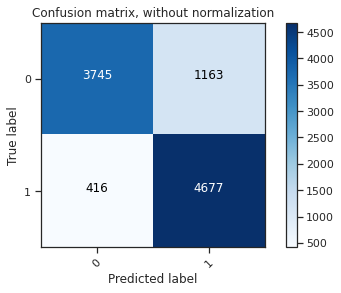

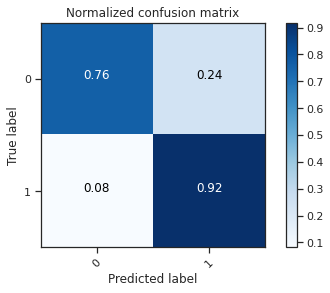

In [0]:
class_names = ['0','1']
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(confusion_matrix, classes=class_names, title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(confusion_matrix, classes=class_names, normalize=True,title='Normalized confusion matrix')

plt.show()

**Evaluation of Logistic Regression Classifier TF-IDF:**

In [0]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(df_doc2vec['label'], predicted_lr_tf)
print('Confusion Matrix for Logistic Regression Classifier is: %s \n' % confusion_matrix)

from sklearn.metrics import classification_report
print('Classification Report for Logistic Regression Classifier TF-IDF is: \n')
print(classification_report(df_doc2vec['label'], predicted_lr_tf))

Confusion Matrix for Logistic Regression Classifier is: [[3843 1065]
 [ 356 4737]] 

Classification Report for Logistic Regression Classifier TF-IDF is: 

              precision    recall  f1-score   support

           0       0.92      0.78      0.84      4908
           1       0.82      0.93      0.87      5093

    accuracy                           0.86     10001
   macro avg       0.87      0.86      0.86     10001
weighted avg       0.86      0.86      0.86     10001



Confusion matrix, without normalization
[[3843 1065]
 [ 356 4737]]
Normalized confusion matrix
[[0.78300733 0.21699267]
 [0.06989986 0.93010014]]


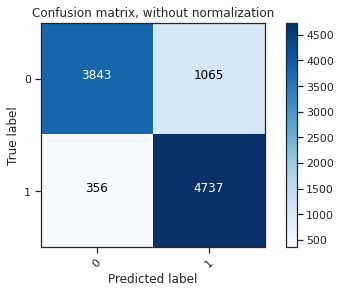

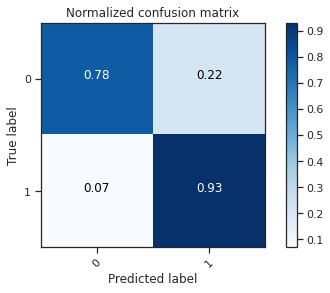

In [0]:
class_names = ['0','1']
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(confusion_matrix, classes=class_names, title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(confusion_matrix, classes=class_names, normalize=True,title='Normalized confusion matrix')

plt.show()

**Evaluation of Random Forest Classifier TF-IDF:**

In [0]:


from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(df_doc2vec['label'], predicted_rf_tf)
print('Confusion Matrix for the Random Forest Algorithm is: %s \n' % confusion_matrix)

from sklearn.metrics import classification_report
print('Classification Report for Random Forest Classifier TF-IDF is: \n')
print(classification_report(df_doc2vec['label'], predicted_rf_tf))

Confusion Matrix for the Random Forest Algorithm is: [[4892   16]
 [ 612 4481]] 

Classification Report for Random Forest Classifier TF-IDF is: 

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      4908
           1       1.00      0.88      0.93      5093

    accuracy                           0.94     10001
   macro avg       0.94      0.94      0.94     10001
weighted avg       0.94      0.94      0.94     10001



Confusion matrix, without normalization
[[4892   16]
 [ 612 4481]]
Normalized confusion matrix
[[0.99674002 0.00325998]
 [0.12016493 0.87983507]]


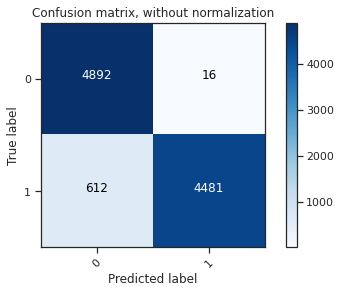

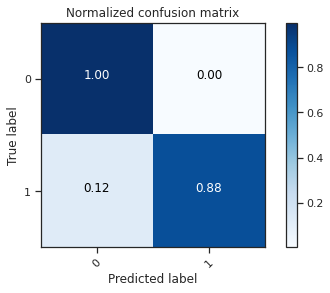

In [0]:
class_names = ['0','1']
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(confusion_matrix, classes=class_names, title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(confusion_matrix, classes=class_names, normalize=True,title='Normalized confusion matrix')

plt.show()

Factor from professor's list

#Factor 4 LDA
Team member : Asha Aher


In [0]:
df_new_feature = df_final.copy()
#df_new_feature.to_csv('/content/drive/Shared drives/SheCodes/Datasets/liar_fakenews_amalgmated.csv')


In [0]:
df_new_feature['label'] = df_new_feature.label
data = df_new_feature
train_lda = data[['text', 'label']]
train_lda.head(4)

,text,label
0,bueno air reuter argentin leader mauricio macr...,0
1,beij reuter senior chines space offici militar...,0
2,protest trumpcar ramp congression budget offic...,1
3,washington reuter u presid donald trump chief ...,0



Split the clean news into list of words

In [0]:
processed_docs = train_lda['text'].map(lambda doc: doc.split(" "))
processed_docs[:4]

0    [bueno, air, reuter, argentin, leader, maurici...
1    [beij, reuter, senior, chines, space, offici, ...
2    [protest, trumpcar, ramp, congression, budget,...
3    [washington, reuter, u, presid, donald, trump,...
Name: text, dtype: object

Latent Dirichlet Allocation (LDA)
It is an example of a probabilistic topic model. Topic models are a great way to automatically explore and structure a large set of documents: they group or cluster documents based on the words that occur in them. As documents on similar topics tend to use a similar sub-vocabulary, the resulting clusters of documents can be interpreted as discussing different 'topics'.

In [0]:
def get_word_tokens(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if len(token) > 3:
            result.append(token)
    return result
tokenized_docs_local = df_new_feature['text'].map(get_word_tokens)

Create a function to build the dictionary and tokenized docs for given feature
Below function does the following

#### Dictionary Returns Dictionary given, dataframe and column name
#### Tokenizeddocs Returns Tokenizeddocs, of the all the words in a text in that column can be used for bow_corpus
#### Dictionary is filtered using Gensim filter_extremes Filter out tokens that appear in less than 15 documents (absolute number) or more than 0.5 documents (fraction of total corpus size, not absolute number). after the above two steps, keep only the first 100000 most frequent tokens.

In [0]:
def get_dictionary_print_words(dataframe,colname):
    dictionary_gensim = gensim.corpora.Dictionary(processed_docs)
    count = 0
    print('######## DICTIONARY Words and occurences ########')
    for k, v in dictionary_gensim.iteritems():
        print(k, v)
        count += 1
        if count > 10:
            break
    dictionary_gensim.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)
    return dictionary_gensim, tokenized_docs_local

Gensim filter_extremes
Filter out tokens that appear less than 15 documents (absolute number) or more than 0.5 documents (fraction of total corpus size, not absolute number). after the above two steps, keep only the first 100000 most frequent tokens.

Create a function to build bow_corpus from dictionary and tokenized_docs

In [0]:

def get_bow_corpus_print_sample(dataframe,colname):
    dictionary_gensim, tokenized_docs_local = get_dictionary_print_words(dataframe, colname)
    bow_corpus_local = [dictionary_gensim.doc2bow(doc) for doc in tokenized_docs_local]
    bow_doc_local_0 = bow_corpus_local[0]
    print('\n ######## BOW VECTOR FIRST ITEM ########')
    print(bow_doc_local_0)
    print('\n ######## PREVIEW BOW ########')
    for i in range(len(bow_doc_local_0)):
        print("Word {} (\"{}\") appears {} time.".format(bow_doc_local_0[i][0], 
                                               dictionary_gensim[bow_doc_local_0[i][0]], bow_doc_local_0[i][1]))
    return bow_corpus_local, dictionary_gensim


Gensim doc2bow

For each document we create a dictionary reporting how many words and how many times those words appear. Save this to ‘bow_corpus’, then check our selected document earlier

Create a function to build tfidf_corpus from bow_corpus
Create tf-idf model object using models.TfidfModel on ‘bow_corpus’ and save it to ‘tfidf’, then apply transformation to the entire corpus and call it ‘corpus_tfidf’. Finally we preview TF-IDF scores for our first document.

In [0]:
def get_tfidf_corpus_print_sample(bow_corpus_local):
    from gensim import corpora, models
    tfidf = models.TfidfModel(bow_corpus_local)
    tfidf_corpus_local = tfidf[bow_corpus_local]
    print('\n ######## TFIDF VECTOR FIRST ITEM ########')
    
    from pprint import pprint
    for doc in tfidf_corpus_local:
        pprint(doc)
        break
    return tfidf_corpus_local


Create a function to run ldamodel and print top 10 topics

In [0]:
def get_lda_model_print_top_topics(bow_corpusforlda,numtopics,dictionaryforlda):
    lda_model = gensim.models.LdaMulticore(bow_corpusforlda, num_topics=numtopics, id2word=dictionaryforlda, passes=2, workers=2)
    lda_all_topics=lda_model.show_topics(num_topics=numtopics, num_words=10,formatted=False)
    lda_topics_words = [(tp[0], [wd[0] for wd in tp[1]]) for tp in lda_all_topics]

    #Below Code Prints Topics and Words
    for topic,words in lda_topics_words:
        print(str(topic)+ "::"+ str(words))
    return lda_model

Create a function to run ldamodel and print top 10 topics

In [0]:
def get_lda_model_topics_topwords_print_top_topics(bow_corpusforlda,numtopics,dictionaryforlda):
    lda_model = gensim.models.LdaMulticore(bow_corpusforlda, num_topics=numtopics, id2word=dictionaryforlda, passes=2, workers=2, random_state=1)
    lda_all_topics=lda_model.show_topics(num_topics=numtopics, num_words=10,formatted=False)
    lda_topics_words = [(tp[0], [wd[0] for wd in tp[1]]) for tp in lda_all_topics]

    #Below Code Prints Topics and Words
    for topic,words in lda_topics_words:
        print(str(topic)+ "::"+ str(words))
    return lda_model,lda_topics_words

Create a function to enrich data with lda topics, lda topics score, top words

In [0]:

def identify_topic_number_score_label_topwords(text,dictionary_local,lda_model_local,lda_topics_top_words_local):
    bow_vector_local = dictionary_local.doc2bow(get_word_tokens(text))
    topic_number_local, topic_score_local = sorted(
        lda_model_local[bow_vector_local], key=lambda tup: -1*tup[1])[0]
    #print (topic_number_local, topic_score_local)
    return pd.Series([topic_number_local, topic_score_local," ".join(lda_topics_top_words_local[int(topic_number_local)][1])])

Create a function that can enrich topic data to dataframe

In [0]:
def update_lda_results_to_dataset(dataframe,topiccolnames,coltoapplylda,colnamedictionary,colnameldamodel, colnameldatopwords):
    dataframe[topiccolnames] = dataframe.apply(
    lambda row: identify_topic_number_score_label_topwords(
        row[coltoapplylda],colnamedictionary,colnameldamodel,
        colnameldatopwords), axis=1)
    return dataframe

Bag of Words
Create a dictionary and tokens
Create a dictionary from ‘processed_docs’ containing the number of times a word appears in the training set.

In [0]:

bow_corpus_headline, dictionary_headline = get_bow_corpus_print_sample(df_new_feature,
                                                                      'text')

######## DICTIONARY Words and occurences ########
0 air
1 argentin
2 barack
3 bueno
4 cooper
5 countri
6 drug
7 fight
8 intern
9 issu
10 leader

 ######## BOW VECTOR FIRST ITEM ########
[(1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (24, 1), (25, 1), (26, 1)]

 ######## PREVIEW BOW ########
Word 1 ("argentin") appears 1 time.
Word 2 ("barack") appears 1 time.
Word 3 ("bueno") appears 1 time.
Word 4 ("cooper") appears 1 time.
Word 5 ("countri") appears 1 time.
Word 6 ("drug") appears 1 time.
Word 7 ("fight") appears 1 time.
Word 8 ("intern") appears 1 time.
Word 9 ("issu") appears 1 time.
Word 10 ("leader") appears 1 time.
Word 11 ("mark") appears 1 time.
Word 12 ("matur") appears 1 time.
Word 14 ("obama") appears 1 time.
Word 15 ("presid") appears 1 time.
Word 16 ("rang") appears 1 time.
Word 17 ("relat") appears 1 time.
Word 18 ("reuter") appears 1 time

Running LDA using Bag of Words
Train our lda model using gensim.models.LdaMulticore and save it to ‘lda_model’

In [0]:

lda_model_headline, lda_headline_topic_words = get_lda_model_topics_topwords_print_top_topics(
    bow_corpus_headline, 10 ,dictionary_headline)

0::['trump', 'elect', 'vote', 'state', 'voter', 'would', 'peopl', 'govern', 'also', 'news']
1::['peopl', 'would', 'also', 'like', 'year', 'state', 'time', 'trump', 'make', 'could']
2::['trump', 'russian', 'state', 'russia', 'would', 'year', 'presid', 'peopl', 'call', 'offic']
3::['clinton', 'trump', 'hillari', 'time', 'email', 'like', 'peopl', 'year', 'state', 'would']
4::['trump', 'state', 'would', 'presid', 'peopl', 'year', 'govern', 'countri', 'obama', 'nation']
5::['trump', 'presid', 'year', 'state', 'would', 'polic', 'report', 'offic', 'nation', 'call']
6::['trump', 'presid', 'republican', 'state', 'would', 'hous', 'peopl', 'china', 'report', 'senat']
7::['trump', 'peopl', 'would', 'presid', 'like', 'countri', 'nation', 'democrat', 'govern', 'year']
8::['trump', 'state', 'would', 'presid', 'year', 'clinton', 'hous', 'also', 'report', 'peopl']
9::['trump', 'presid', 'state', 'time', 'year', 'would', 'like', 'peopl', 'donald', 'support']



Generate TF-IDF bow_corpus
Create tf-idf model object using models.TfidfModel on ‘bow_corpus’ and save it to ‘tfidf’, then apply transformation to the entire corpus and call it ‘corpus_tfidf’. Finally we preview TF-IDF scores for our first document.

In [0]:
tfidf_corpus_headline = get_tfidf_corpus_print_sample(bow_corpus_headline)


 ######## TFIDF VECTOR FIRST ITEM ########
[(1, 0.4249415422847402),
 (2, 0.16021330822956753),
 (3, 0.4214629839064553),
 (4, 0.2133967762284273),
 (5, 0.08325778000967961),
 (6, 0.22249755349079622),
 (7, 0.14447832011845266),
 (8, 0.13666845645234935),
 (9, 0.109086281542746),
 (10, 0.11801627918264052),
 (11, 0.1792924634282589),
 (12, 0.36209130291752734),
 (14, 0.10698506981235635),
 (15, 0.054400750747594526),
 (16, 0.22160167493910968),
 (17, 0.13436765841148013),
 (18, 0.08723764740928176),
 (19, 0.1240753976511045),
 (20, 0.05266864991602062),
 (21, 0.1759427939455366),
 (22, 0.30900689704656503),
 (24, 0.17301114998408143),
 (25, 0.1385251600433867),
 (26, 0.051037233991697975)]


Running LDA model using Bag of Words
Train our lda model using gensim.models.LdaMulticore and save it to ‘lda_model’

GOAL: To get top ten topics with top words.

In [0]:
lda_tfidf_model_headline  = get_lda_model_print_top_topics(tfidf_corpus_headline,10,dictionary_headline)

0::['syria', 'turkey', 'syrian', 'iraqi', 'russian', 'islam', 'attack', 'forc', 'iraq', 'minist']
1::['trump', 'woman', 'clinton', 'black', 'hillari', 'protest', 'student', 'polic', 'video', 'peopl']
2::['myanmar', 'rohingya', 'boiler', 'rakhin', 'nasa', 'pope', 'bangladesh', 'otto', 'trump', 'room']
3::['erdogan', 'court', 'turkey', 'turkish', 'trump', 'sector', 'puigdemont', 'senat', 'gorsuch', 'vote']
4::['dont', 'walker', 'abort', 'scott', 'insur', 'health', 'turnbul', 'unborn', 'florida', 'trump']
5::['para', 'trump', 'como', 'health', 'todo', 'kaepernick', 'medicar', 'cuban', 'bill', 'black']
6::['trump', 'israel', 'soro', 'obama', 'jerusalem', 'news', 'polic', 'presid', 'state', 'migrant']
7::['syria', 'syrian', 'assad', 'rate', 'percent', 'rebel', 'taiwan', 'unemploy', 'militari', 'russian']
8::['merkel', 'mugab', 'percent', 'http', 'mnangagwa', 'germani', 'insur', 'health', 'youtub', 'chancellor']
9::['trump', 'clinton', 'republican', 'presid', 'state', 'elect', 'obama', 'vote

Semisupervised Labeling
Based on train,test and valid data explored the topic scores for sample data and identified below topics

In [0]:

semisupervised_topic_labels = ['topic0','topic1','topic2','topic3','topic4','topic5','topic6','topic7','topic8','topic9']

Function to add topicnumber, topicscore, topiclabel, topwords

In [0]:
headlinetopiccolnames = ['topic_number','lda_score','topic_top_words']
df_new_feature = update_lda_results_to_dataset(
    df_new_feature, headlinetopiccolnames,'text', dictionary_headline, lda_model_headline, lda_headline_topic_words)
df_new_feature.head()

,title,text,label,topic_number,lda_score,topic_top_words
0,macri vow matur relationship u,bueno air reuter argentin leader mauricio macr...,0,5,0.696750,trump presid year state would polic report off...
1,chines space offici promot part militari reshuffl,beij reuter senior chines space offici militar...,0,2,0.541200,trump russian state russia would year presid p...
2,republican senat priest thrown jail protest tr...,protest trumpcar ramp congression budget offic...,1,5,0.427716,trump presid year state would polic report off...
3,cuba could stop attack american white hous,washington reuter u presid donald trump chief ...,0,6,0.636390,trump presid republican state would hous peopl...
4,n j governor chris christi accost heckler milw...,new york reuter new jersey governor chris chri...,0,5,0.427202,trump presid year state would polic report off...


Visualize the LDA Distribution of news against Top 10 Topics
GOAL 1: Each of the N documents will be represented in the LDA model by a vector of length M GOAL 2: Each of the M topics is represented by a vector of length V

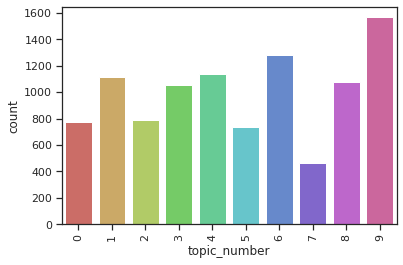

In [0]:
import seaborn as sb
def create_distribution(dataFile):
    g = sb.countplot(x='topic_number', data=dataFile, palette='hls')
    g.set_xticklabels(g.get_xticklabels(),rotation=90)

    return g

create_distribution(df_new_feature) # TRAIN Document Vector

Saving file

In [0]:

df_new_feature.to_csv('/content/drive/Shared drives/SheCodes/Datasets/train_lda.csv', sep=',')



#Factor 5 Source Reputation
Team member Asha Aher


In [0]:
df_new_source = df_final.copy()
df_new_source.head

<bound method NDFrame.head of                                                    title  ... label
0                         macri vow matur relationship u  ...     0
1      chines space offici promot part militari reshuffl  ...     0
2      republican senat priest thrown jail protest tr...  ...     1
3             cuba could stop attack american white hous  ...     0
4      n j governor chris christi accost heckler milw...  ...     0
...                                                  ...  ...   ...
9996   thought polic u border control want studi face...  ...     1
9997                                                      ...     0
9998   ben carson prais time trump compar child moles...  ...     1
9999      sore loser rep jare huffman ca boycott inaugur  ...     0
10000  hama deputi leader say continu iran tie arm fight  ...     0

[10001 rows x 3 columns]>

In [0]:

df_new_source['text'].unique()

array(['bueno air reuter argentin leader mauricio macri said wednesday state visit u presid barack obama mark start new matur relat countri would cooper issu rang trade fight intern drug traffick',
       'beij reuter senior chines space offici militari offic promot run peopl liber armi key equip develop depart militari said monday part reshuffl ahead next month communist parti congress china arm forc world largest ramp capabl new equip like aircraft carrier stealth fighter countri pursu assert stanc disput east south china sea seek project power far home shore brief stori websit militari technolog exhibit beij defenc ministri name li shangfu new head militari equip develop depart gave detail appoint accord offici resum li previous director one china main satellit launch site xichang southwestern provinc sichuan involv mission explor moon u defens depart highlight china increas space capabl say pursu activ aim prevent nation use space base asset crisi china insist peac ambit space test

In [0]:


for index, row in df_new_source.iterrows():
    score = 1
    if (row['text'] == 'some fake stories'):
        score = 0.5
    df_new_source.at[index, 'fake_score'] = score

df_new_source.head()

,title,text,label,fake_score
0,macri vow matur relationship u,bueno air reuter argentin leader mauricio macr...,0,1.0
1,chines space offici promot part militari reshuffl,beij reuter senior chines space offici militar...,0,1.0
2,republican senat priest thrown jail protest tr...,protest trumpcar ramp congression budget offic...,1,1.0
3,cuba could stop attack american white hous,washington reuter u presid donald trump chief ...,0,1.0
4,n j governor chris christi accost heckler milw...,new york reuter new jersey governor chris chri...,0,1.0


In [0]:
def DATAMINERS_getSourceReputationScore(source): # return between 0 and 1, being 0 = True,  1 = Fake
    if (source == ""):
        return 0
    d = df_new_source[df_new_source['text'].str.match(source)]
    if (d['fake_score'].empty):
        return 0
    return int(d['fake_score'].values)


DATAMINERS_getSourceReputationScore('24wpn')

0

# Factor 6 - Spam Score
Team member Asha Aher

In [0]:
df_scam = df_final.copy()
df_scam.head()

,title,text,label
0,macri vow matur relationship u,bueno air reuter argentin leader mauricio macr...,0
1,chines space offici promot part militari reshuffl,beij reuter senior chines space offici militar...,0
2,republican senat priest thrown jail protest tr...,protest trumpcar ramp congression budget offic...,1
3,cuba could stop attack american white hous,washington reuter u presid donald trump chief ...,0
4,n j governor chris christi accost heckler milw...,new york reuter new jersey governor chris chri...,0


In [0]:

#load the spam dictionary

spam_dict = pd.read_csv('/content/drive/Shared drives/SheCodes/Datasets/spam.csv', usecols= [1], names = ['spamword'], encoding='latin-1', error_bad_lines=False)
spam_dict = spam_dict.fillna(0)
spam_dict = spam_dict.iloc[1:]
spam_dict = spam_dict.drop_duplicates()

spam_dict.head(5)

,spamword
1,"Go until jurong point, crazy.. Available only ..."
2,Ok lar... Joking wif u oni...
3,Free entry in 2 a wkly comp to win FA Cup fina...
4,U dun say so early hor... U c already then say...
5,"Nah I don't think he goes to usf, he lives aro..."


In [0]:

#Count vector for train data
from sklearn.feature_extraction.text import CountVectorizer
spamcountV = CountVectorizer(vocabulary=list(set(spam_dict['spamword'])))
train_count = spamcountV.fit_transform(df_scam['text'])

Function to simplify label classes

Original -- True

True -- True

Mostly-true -- True

Half-true -- True

Barely-true -- False

False -- False

Pants-fire -- False

In [0]:

true_labels = ['original','true','mostly-true','half-true']
false_labels = ['barely-true','false','pants-fire']
def simplify_label(input_label):
    if input_label in true_labels:
        return 1
    else:
        return 0

Read input data files

In [0]:

labelcolname = 'encoded_label'

df_scam['label'] = df_scam.apply(lambda row: simplify_label(row['label']), axis=1)

In [0]:
from sklearn.naive_bayes import MultinomialNB
nb_pipeline_spam = Pipeline([
        ('NBCV',spamcountV),
        ('nb_clf',MultinomialNB())])

nb_pipeline_spam.fit(df_scam['text'],df_scam['label'])
predicted_spam_nb = nb_pipeline_spam.predict(df_scam['text'])
np.mean(predicted_spam_nb == df_scam['label'])

1.0

**Feature Analysis on : Content Statitics:**

By Team Member: Sri Sruthi Chilukuri

When it comes to exploting data using statistical methods, we can use **exploratory graphics**

These are the priliminary steps we apply to the data in hand to: 1.feel the data- see their distributions and shape 2.check assumptions-and dependencies; correlations 3.check if the data assumptions match the methods/models we got to use 4.check for anomalies-outliers and unusual distributions and errors 5.get suggestions-help us persue a different angle or different method of analysis

why exploratory graphics? -information dense -best way to check for shape, gaps or outliers

with one variable: we use univariate distributions like bar chart.

boxplots for qualitataive variables; detect outliers histograms

scatterplot

multivariate distributions:

overall, content statistics help us with: have what u need? are there clumps or gaps? exceptional cases? errors in data?

**exploratory statistics:**

dealing with numerics in the data
what we do? -we explore the data -get emperical estimates

manipulate data(like transforming variables)
check sensitivity of results
robust statistics: -resampling technique - like cross validation -transforming - like smoothing functions fix skewed dataset

**descriptive statistics:** -tell data stroy use little data to stand in for a lot of data

use center of data - mean,mode,median
consider the spread of the data - ramge, percentiles, interquartile range, variance and std deviation

In [0]:
df_cs = df_final.copy()

In [0]:
df_cs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   10001 non-null  object
 1   text    10001 non-null  object
 2   label   10001 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 234.5+ KB


In [0]:
df_cs['title'] = df_final['title'].astype(str)

In [0]:
df_cs['text'] = df_final['text'].astype(str)

In [0]:
df_cs.head()

,title,text,label
0,easi understand reason ancestor illeg come ame...,mani time liber use argument everyon relat cam...,1
1,fed warn spring break travel mexico,mani high school colleg student around countri...,0
2,china say make unremit effort north korea nucl...,beij reuter china said wednesday make unremit ...,0
3,donald trump face obstacl resum waterboard new...,washington first month donald j trump presid r...,0
4,make special counsel lead trump russia collus ...,serious make stuff great real honest medium to...,1


###Exploratory statistics

**Number of characters in "Title" and "Text"**

Extracting samples number in each class of the dataset

In [0]:
fake = df_cs[df_final['label'] == 1].shape[0]
Not_fake = df_cs[df_final['label'] == 0].shape[0]

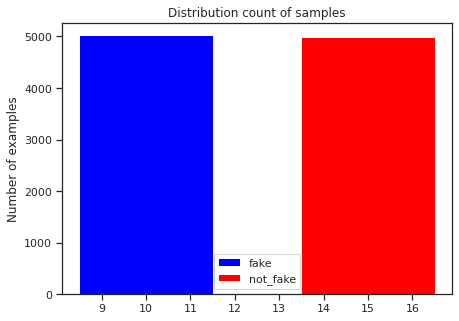

In [0]:
plt.rcParams['figure.figsize'] = (7, 5)
plt.bar(10,fake,3, label="fake", color='blue')
plt.bar(15,Not_fake,3, label="not_fake", color='red')
plt.legend()
plt.ylabel('Number of examples')
plt.title('Distribution count of samples')
plt.show()

In [0]:
df_cs['label'].value_counts()

1    5018
0    4983
Name: label, dtype: int64

In [0]:
df_cs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   10001 non-null  object
 1   text    10001 non-null  object
 2   label   10001 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 234.5+ KB


Now, lets analyse the number of characters in each "title" samples; i.e. lets check the length of each "title" sample in the dataframe by plotting it over a distribution



In [0]:
def length(title):    
    return len(title)

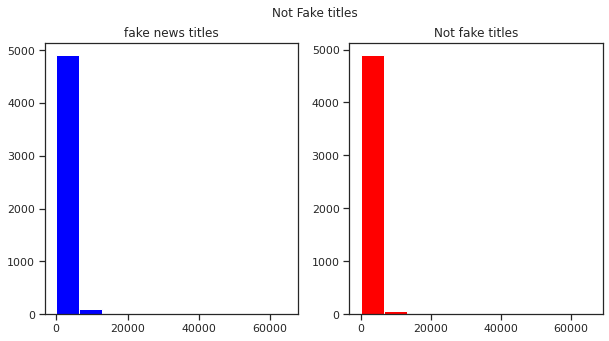

In [0]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
title_len=df_cs[df_cs['label']==1]['text'].str.len()
ax1.hist(title_len,color='blue')
ax1.set_title('fake news titles')
title_len=df_cs[df_cs['label']==0]['text'].str.len()
ax2.hist(title_len,color='red')
ax2.set_title('Not fake titles')
fig.suptitle('Not Fake titles')
plt.show()

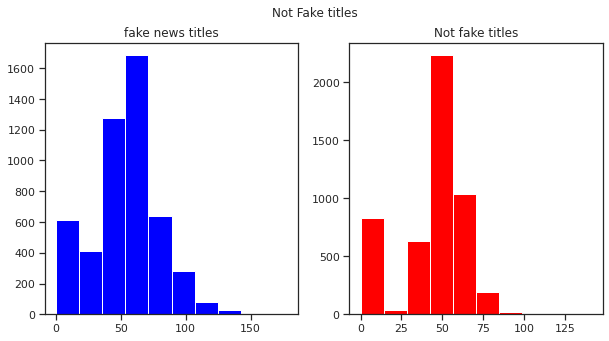

In [0]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
title_len=df_final[df_final['label']==1]['title'].str.len()
ax1.hist(title_len,color='blue')
ax1.set_title('fake news titles')
title_len=df_cs[df_cs['label']==0]['title'].str.len()
ax2.hist(title_len,color='red')
ax2.set_title('Not fake titles')
fig.suptitle('Not Fake titles')
plt.show()

Number of words in a text

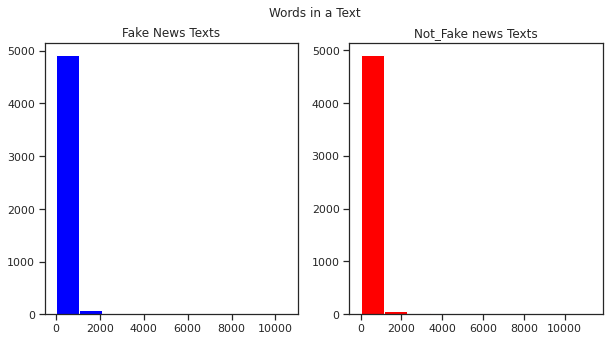

In [0]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
text_len=df_cs[df_cs['label']==1]['text'].str.split().map(lambda x: len(x))
ax1.hist(text_len,color='blue')
ax1.set_title('Fake News Texts')
text_len=df_cs[df_cs['label']==0]['text'].str.split().map(lambda x: len(x))
ax2.hist(text_len,color='red')
ax2.set_title('Not_Fake news Texts')
fig.suptitle('Words in a Text')
plt.show()

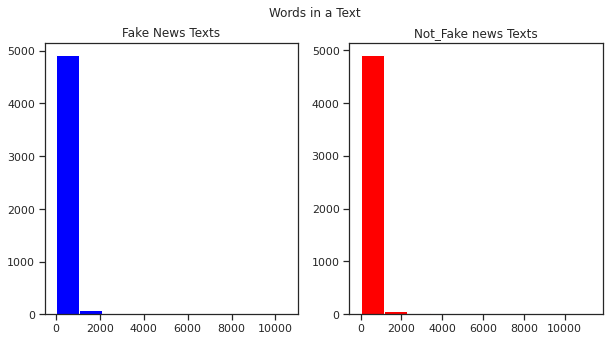

In [0]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
text_len=df_cs[df_cs['label']==1]['text'].str.split().map(lambda x: len(x))
ax1.hist(text_len,color='blue')
ax1.set_title('Fake News Texts')
text_len=df_cs[df_cs['label']==0]['text'].str.split().map(lambda x: len(x))
ax2.hist(text_len,color='red')
ax2.set_title('Not_Fake news Texts')
fig.suptitle('Words in a Text')
plt.show()

Average word Length in each Text

Text(0.5, 0.98, 'Average word length in each News Text')

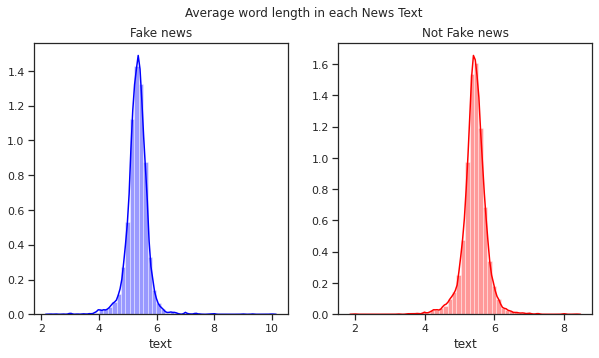

In [0]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
word=df_cs[df_cs['label']==1]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='blue')
ax1.set_title('Fake news')
word=df_cs[df_cs['label']==0]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='red')
ax2.set_title('Not Fake news')
fig.suptitle('Average word length in each News Text')

N-Gram Analysis

For this dataset, I will take n=2 i.e. bigram over the text of the news. Checking for the common bigrams in the texts

In [0]:
def get_top_text_bigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

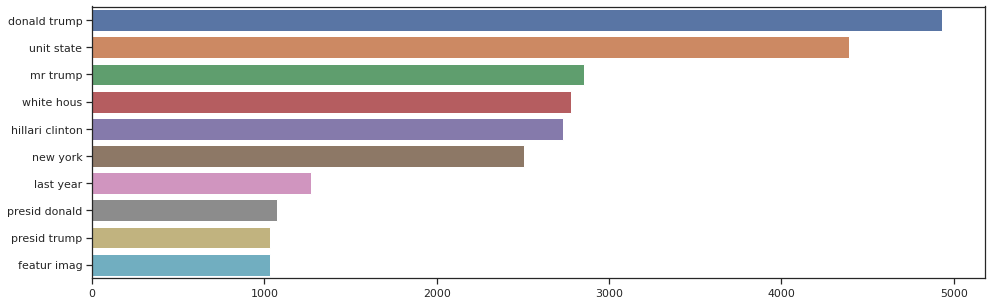

In [0]:
plt.figure(figsize=(16,5))
top_text_bigrams=get_top_text_bigrams(df_cs['text'])[:10]
x,y=map(list,zip(*top_text_bigrams))
sns.barplot(x=y,y=x)

Inference:

The terms "donald trump" and "unit state" have been most common; both in class 0 and class 1.

Wordclouds

In [0]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

def plot_wordcloud(data,backgroundcolor = 'white', width = 800, height = 600):
    wordcloud = WordCloud(stopwords = STOPWORDS, background_color = backgroundcolor,
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15, 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

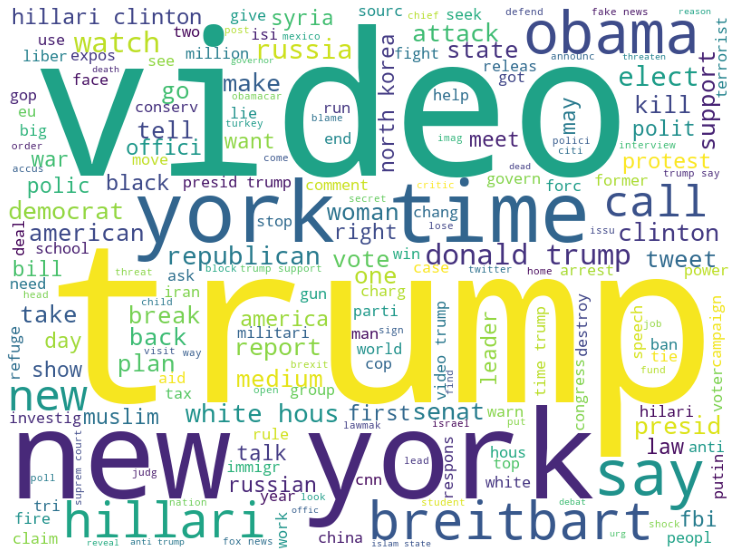

In [0]:
plot_wordcloud(' '.join(df_cs['title']))

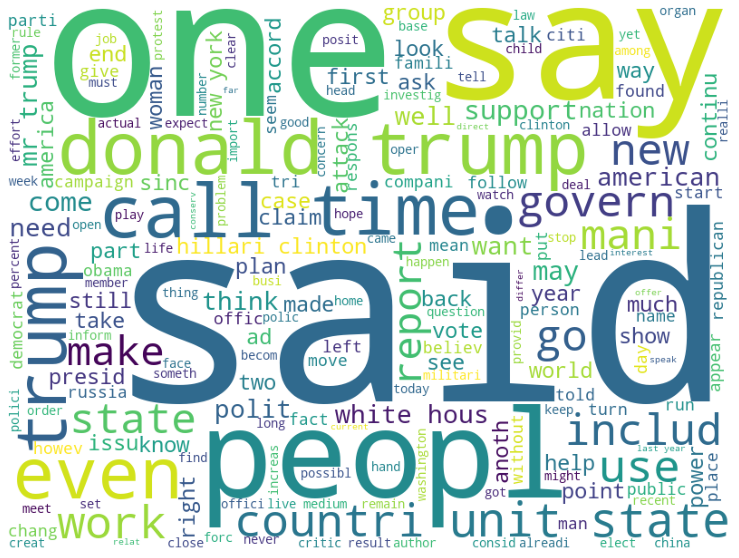

In [0]:
plot_wordcloud(' '.join(df_cs['text']))

Adding features to the datasets that show the statistics like length, median, mean of the textual features and normalise them.

In [0]:
df_cs['Title_length'] = df_cs['title'].str.len()

In [0]:
df_cs['Text_length'] = df_cs['text'].str.len()

In [0]:
df_cs

,title,text,label,Title_length,Text_length
0,easi understand reason ancestor illeg come ame...,mani time liber use argument everyon relat cam...,1,56,950
1,fed warn spring break travel mexico,mani high school colleg student around countri...,0,35,2686
2,china say make unremit effort north korea nucl...,beij reuter china said wednesday make unremit ...,0,54,241
3,donald trump face obstacl resum waterboard new...,washington first month donald j trump presid r...,0,56,6883
4,make special counsel lead trump russia collus ...,serious make stuff great real honest medium to...,1,103,5764
...,...,...,...,...,...
9996,anna dewdney dy author llama llama book new yo...,anna dewdney whose llama llama pictur book amu...,1,53,2043
9997,steadi gain econom outlook fed leaf interest r...,washington feder reserv wait inform trump admi...,0,71,3015
9998,u led anti islam state coalit say iraqi kurdis...,baghdad reuter u led anti islam state coalit s...,0,74,409
9999,,tell presid barack obama also ask former presi...,1,0,79


In [0]:
import pandas as pd
from sklearn import preprocessing


In [0]:
df_cs["Title_length(norm)"] = df_cs["Title_length"] / df_cs["Title_length"].max()
df_cs["Text_length(norm)"] = df_cs["Text_length"] / df_cs["Text_length"].max()


In [0]:
#Generating statistical columns like mean, median and variance for the "Text" present in the dataset.
df_cs["Text_length(median)"] = df_cs["Text_length"].median()
df_cs["Text_length(mean)"] = df_cs["Text_length"].mean()
df_cs["Text_length(var)"] = df_cs["Text_length"].var()

#creating a new feature "applicability_of_text" which is a combination of then text length 
df_cs["applicability_of_text"] = df_cs["Text_length(norm)"]*df_cs["Text_length"].mean()
df_cs["applicability_of_title"] = df_cs["Title_length(norm)"]*df_cs["Title_length"].mean()


In [0]:
df_cs["applicability_of_text"]

0         25.149558
1         71.107065
2          6.380046
3        182.215163
4        152.591632
            ...    
9996      54.084786
9997      79.816754
9998      10.827546
9999       2.091384
10000     15.592726
Name: applicability_of_text, Length: 10001, dtype: float64

normalizing these columns

In [0]:
df_cs["applicability_of_text(Norm)"] = df_cs["applicability_of_text"] / df_cs["applicability_of_text"].max()*df_cs["Text_length(median)"]
df_cs["applicability_of_title(Norm)"] = df_cs["applicability_of_title"] / df_cs["applicability_of_title"].max()*df_cs["Text_length(median)"]

In [0]:
df_cs.columns

Index(['title', 'text', 'label', 'Title_length', 'Text_length',
       'Title_length(norm)', 'Text_length(norm)', 'Text_length(median)',
       'Text_length(mean)', 'Text_length(var)', 'applicability_of_text',
       'applicability_of_title', 'applicability_of_text(Norm)',
       'applicability_of_title(Norm)'],
      dtype='object')

In [0]:
df_sample = df_cs

In [0]:
#df_final = df_final.drop(['label'], axis=1)
df_sample = df_sample.drop(['title', 'text', 'Title_length', 'Text_length', 'applicability_of_text', 'applicability_of_title', 'Text_length(median)', 'Text_length(mean)'], axis=1)

In [0]:
df_sample.head(4)

,label,Title_length(norm),Text_length(norm),Text_length(var),applicability_of_text(Norm),applicability_of_title(Norm)
0,1,0.314607,0.014463,5.798776e+06,18.571015,403.955056
1,0,0.196629,0.040893,5.798776e+06,52.507102,252.471910
2,0,0.303371,0.003669,5.798776e+06,4.711173,389.528090
3,0,0.314607,0.104791,5.798776e+06,134.551893,403.955056


In [0]:
y = df_sample['label']
X = df_sample.drop(['label'], axis=1)

In [0]:
X.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)
X_final_train, X_final_test, y_final_train, y_final_test = train_test_split(X, y, test_size=0.20, random_state=100, stratify=y)
X_final_train.reset_index(drop=True, inplace=True)
X_final_test.reset_index(drop=True, inplace=True)
y_final_train.reset_index(drop=True, inplace=True)
y_final_test.reset_index(drop=True, inplace=True)

In [0]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, roc_auc_score, f1_score, confusion_matrix, accuracy_score, \
    classification_report, precision_recall_curve, roc_curve, auc, average_precision_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score, train_test_split, cross_val_predict
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler

In [0]:
classifiers = {
    "LogisticRegression": (LogisticRegression()),
    "KNearest": (KNeighborsClassifier()),
    "Support Vector Classifier": (SVC()),
    "DecisionTreeClassifier": (DecisionTreeClassifier()),
    "Naive Bayes": (GaussianNB()),
    "Random forests": (RandomForestClassifier()),
    "XGBoost Classifier": (XGBClassifier()),
    "GradientBoostingClassifier": (GradientBoostingClassifier()),
    "MLP Classifier": (MLPClassifier())
}

In [0]:
def run_all_models(folds=5):
    for classifier_name, classifier in classifiers.items():
        k_fold = StratifiedKFold(n_splits=folds, random_state=100, shuffle=True)
        cross_val_scores = []
        precision_scores = []
        recall_scores = []
        roc_auc_scores = []
        f1_scores = []
        for train_index, test_index in k_fold.split(X_final_train, y_final_train):
            X_train, X_test = pd.DataFrame(data=X_final_train, index=train_index), pd.DataFrame(data=X_final_train, index=test_index)
            y_train, y_test = pd.DataFrame(data=y_final_train, index=train_index), pd.DataFrame(data=y_final_train, index=test_index)
            model = classifier

            model.fit(X_train, y_train)
            scores = cross_val_score(model, X_train, y_train.values.ravel(), cv=5)
            cross_val_scores.append(scores)
            y_pred = model.predict(X_test)
            precision_scores.append(precision_score(y_test, y_pred))
            recall_scores.append(recall_score(y_test, y_pred))
            roc_auc_scores.append(roc_auc_score(y_test, y_pred))
            f1_scores.append(f1_score(y_test, y_pred))

        print('============================= {} ============================='.format(classifier_name))
        print('Mean cross validation score: {}'.format(np.array([cross_val_scores]).mean()))
        print('Mean precision score: {}'.format(np.array([precision_scores]).mean()))
        print('Mean Recall score: {}'.format(np.array([recall_scores]).mean()))
        print('Mean ROC-AUC score: {}'.format(np.array([roc_auc_scores]).mean()))
        print('Mean F1 score: {}'.format(np.array([f1_scores]).mean()))
        print('******* Real test dataset metrics *******')
        y_final_pred = model.predict((X_final_test))
        print('Accuracy score for the real test set:\n', accuracy_score(y_final_test, y_final_pred))
        print('confusion matrix for the real test set:\n', confusion_matrix(y_final_test, y_final_pred))
        print('Classification report for the real test set:\n', classification_report(y_final_test, y_final_pred))
        if classifier_name != 'Support Vector Classifier':
            y_final_pred_prob = model.predict_proba(X_test)
            plot_auc_roc_curve(y_test, y_final_pred_prob[:, 1], classifier_name)
            plot_precision_recall_curve(y_test, y_final_pred_prob[:, 1], classifier_name)



In [0]:
def plot_auc_roc_curve(y_test, y_pred, name):
    fpr, tpr, thresholds = roc_curve(y_test.to_numpy(), y_pred)
    roc_auc = auc(fpr, tpr)

    # Plot ROC
    plt.title('ROC for {}'.format(name))
    plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([-0.1, 1.0])
    plt.ylim([-0.1, 1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [0]:
def plot_precision_recall_curve(y_test, y_pred_prob, name):
    # Generate precision recall curve values: precision, recall, thresholds
    precision, recall, thresholds = precision_recall_curve(y_test.to_numpy(), y_pred_prob)

    # Plot Precision Recall curve
    plt.plot(recall, precision)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    avg_precision_score = average_precision_score(y_test, y_pred_prob)
    plt.title('PRC for {} - avg precision score: {}'.format(name, str(avg_precision_score)))
    plt.show()

============================= LogisticRegression =============================
Mean cross validation score: 0.5141875
Mean precision score: 0.5099745762711865
Mean Recall score: 0.9276807980049876
Mean ROC-AUC score: 0.5097050606566291
Mean F1 score: 0.6519616802021527
******* Real test dataset metrics *******
Accuracy score for the real test set:
 0.5017491254372813
confusion matrix for the real test set:
 [[   0  997]
 [   0 1004]]
Classification report for the real test set:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       997
           1       0.50      1.00      0.67      1004

    accuracy                           0.50      2001
   macro avg       0.25      0.50      0.33      2001
weighted avg       0.25      0.50      0.34      2001



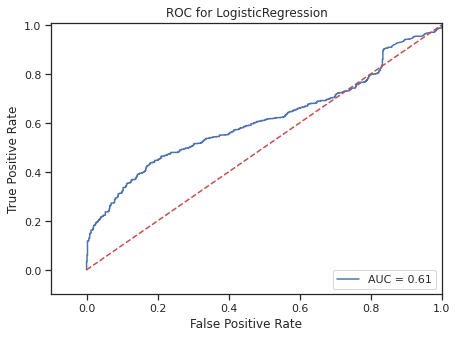

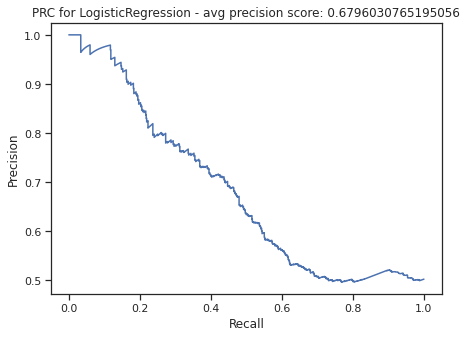

============================= KNearest =============================
Mean cross validation score: 0.6570625
Mean precision score: 0.6661523425724962
Mean Recall score: 0.6357797908715137
Mean ROC-AUC score: 0.6574549309857358
Mean F1 score: 0.6505009960716871
******* Real test dataset metrics *******
Accuracy score for the real test set:
 0.6596701649175413
confusion matrix for the real test set:
 [[712 285]
 [396 608]]
Classification report for the real test set:
               precision    recall  f1-score   support

           0       0.64      0.71      0.68       997
           1       0.68      0.61      0.64      1004

    accuracy                           0.66      2001
   macro avg       0.66      0.66      0.66      2001
weighted avg       0.66      0.66      0.66      2001



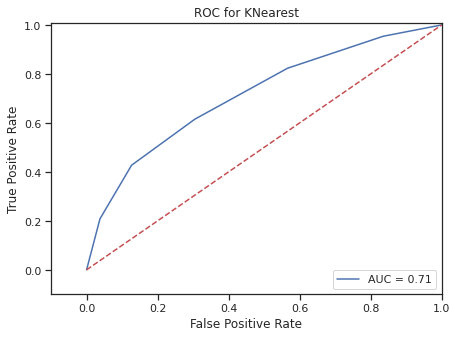

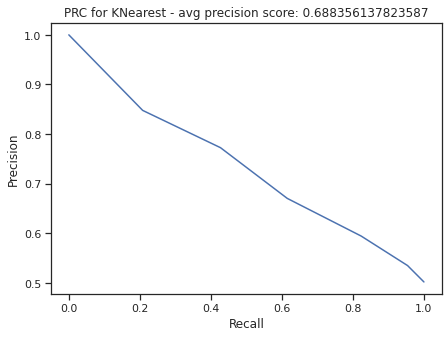

============================= Support Vector Classifier =============================
Mean cross validation score: 0.50175
Mean precision score: 0.50175
Mean Recall score: 1.0
Mean ROC-AUC score: 0.5
Mean F1 score: 0.6682203726052952
******* Real test dataset metrics *******
Accuracy score for the real test set:
 0.5017491254372813
confusion matrix for the real test set:
 [[   0  997]
 [   0 1004]]
Classification report for the real test set:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       997
           1       0.50      1.00      0.67      1004

    accuracy                           0.50      2001
   macro avg       0.25      0.50      0.33      2001
weighted avg       0.25      0.50      0.34      2001

============================= DecisionTreeClassifier =============================
Mean cross validation score: 0.6312187499999999
Mean precision score: 0.6368499724057732
Mean Recall score: 0.5944245861063406
Mean ROC-AUC sc

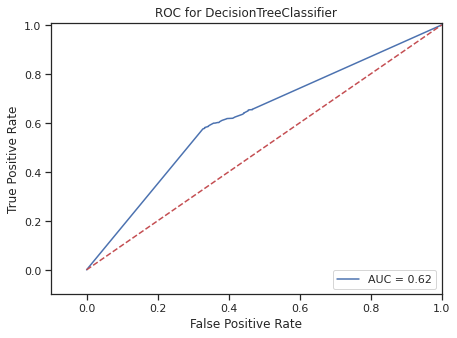

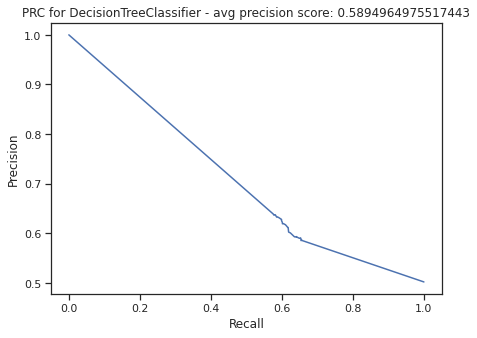

============================= Naive Bayes =============================
Mean cross validation score: 0.6075625
Mean precision score: 0.7204737858679968
Mean Recall score: 0.39785840504591574
Mean ROC-AUC score: 0.6212848092310707
Mean F1 score: 0.5121855970526384
******* Real test dataset metrics *******
Accuracy score for the real test set:
 0.624687656171914
confusion matrix for the real test set:
 [[825 172]
 [579 425]]
Classification report for the real test set:
               precision    recall  f1-score   support

           0       0.59      0.83      0.69       997
           1       0.71      0.42      0.53      1004

    accuracy                           0.62      2001
   macro avg       0.65      0.63      0.61      2001
weighted avg       0.65      0.62      0.61      2001



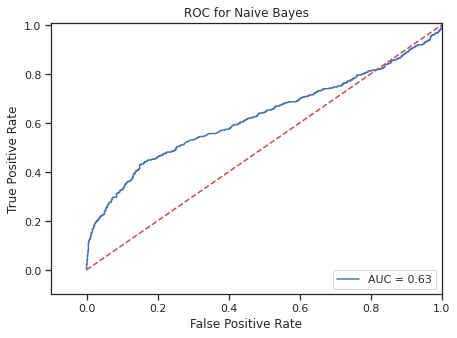

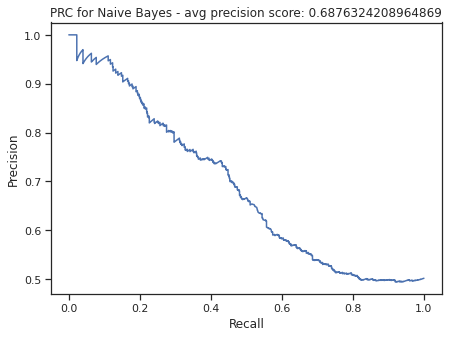

============================= Random forests =============================
Mean cross validation score: 0.6511875
Mean precision score: 0.6608664508956653
Mean Recall score: 0.6168473585649823
Mean ROC-AUC score: 0.6489942084913352
Mean F1 score: 0.6378888267435847
******* Real test dataset metrics *******
Accuracy score for the real test set:
 0.6501749125437282
confusion matrix for the real test set:
 [[693 304]
 [396 608]]
Classification report for the real test set:
               precision    recall  f1-score   support

           0       0.64      0.70      0.66       997
           1       0.67      0.61      0.63      1004

    accuracy                           0.65      2001
   macro avg       0.65      0.65      0.65      2001
weighted avg       0.65      0.65      0.65      2001



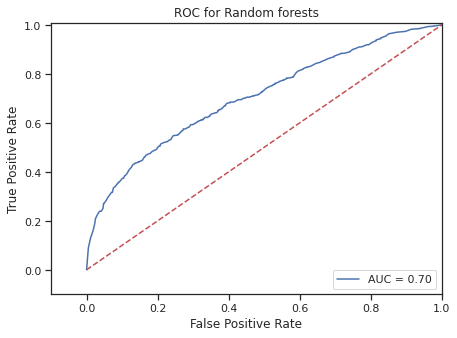

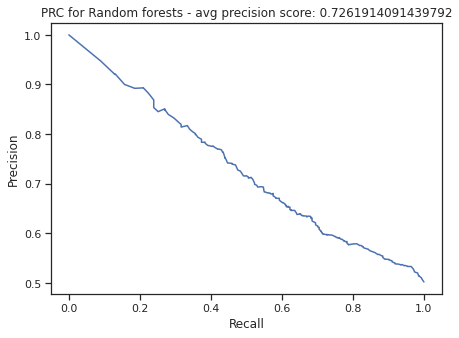

============================= XGBoost Classifier =============================
Mean cross validation score: 0.6941562499999999
Mean precision score: 0.7516126089031229
Mean Recall score: 0.5909364198470201
Mean ROC-AUC score: 0.6971244836064627
Mean F1 score: 0.6616057165599728
******* Real test dataset metrics *******
Accuracy score for the real test set:
 0.6816591704147926
confusion matrix for the real test set:
 [[792 205]
 [432 572]]
Classification report for the real test set:
               precision    recall  f1-score   support

           0       0.65      0.79      0.71       997
           1       0.74      0.57      0.64      1004

    accuracy                           0.68      2001
   macro avg       0.69      0.68      0.68      2001
weighted avg       0.69      0.68      0.68      2001



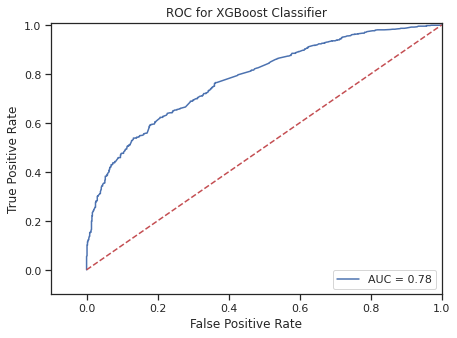

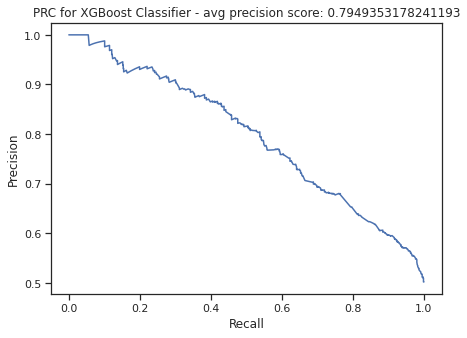

============================= GradientBoostingClassifier =============================
Mean cross validation score: 0.694375
Mean precision score: 0.7491439921155557
Mean Recall score: 0.5929298795352839
Mean ROC-AUC score: 0.6963655696359137
Mean F1 score: 0.6618058758390953
******* Real test dataset metrics *******
Accuracy score for the real test set:
 0.6931534232883558
confusion matrix for the real test set:
 [[815 182]
 [432 572]]
Classification report for the real test set:
               precision    recall  f1-score   support

           0       0.65      0.82      0.73       997
           1       0.76      0.57      0.65      1004

    accuracy                           0.69      2001
   macro avg       0.71      0.69      0.69      2001
weighted avg       0.71      0.69      0.69      2001



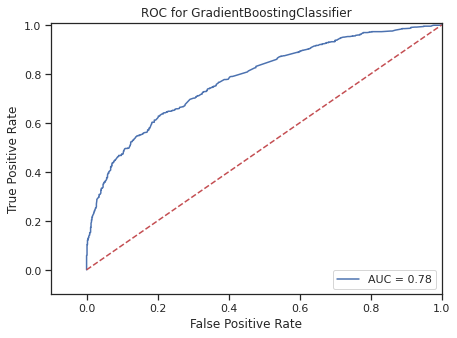

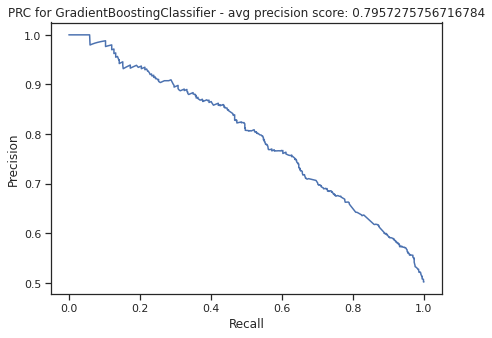

In [0]:
run_all_models()